# Confirmed Positive Cases of COVID-19 in Ontario
## Reem K. Al-Halimi

### Summary

In this notebook I analyze the contents of Ontario Public Health's  dataset of positive COVID-19 cases. The analysis looks at the values within the dataset and their pairwise correlations. Clustering techniques are also used to visualize the data and gauge their correlations: The first uses, K-Modes, only categorical data to create its clusters, while the second clustering technique, K-Prototypes, uses numerical and categorical data to create the clusters.

I also look at how we can use this data to predict the outcome for a given reported case, and to predict a given case's location. To acheive this I create new attributes that highlight potentially useful information for prediction purposes. Appropriate prediction models are also discussed and training and tests sets are created for each of these models.

____________________________________________________________________________________________________________


<p><i>The data for this exercise was collected from: <a><href>https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario/resource/455fd63b-603d-4608-8216-7d8647f43350</href></a>
License: <a><href>https://www.ontario.ca/page/open-government-licence-ontario</href></a>
</i></p>
<hr/>

<p>The data represents confirmed positive cases of COVID19 in Ontario. The purpose of this exercise is to preprocess the data so that it can be used later to build some models. You DO NOT have to build any models in this exercise. This is an open ended design problem.

Our client wants to analyse this data to get some insights. The client is non-technical, and you are in charge of doing the analysis. They want to know what kind of segments exist, if we can predict the outcome, and if we can predict the location of a reporter (patient). </p>

### So, to be precise, we would like to analyse the data in the following ways (separately)...
<ol><li>Run some Cluster Analysis</li>
<li>Predict the Outcome (Outcome1 column)</li>
<li>Given a reported case (patient), where is he/she most likely located</li></ol>

<p>You may drop features, extract/generate new features and preprocess the data in any way you think is reasonable. You DO NOT have to run any analysis or build any models after the preprocessing.</p>

### Expected submission:
<p><ul><li>A preprocessed dataframe split into train and test sets.</li>
<li>Explanation of the choice of algorithms you will run to satisfy the client objectives from #1, #2, #3. You DO NOT have to build any models. Simply describe the steps you will take as a comment.</li></ul></p>


<p>You will walk us through the choices you made in this exercise during the next interview.</p>



## Data Preparation


In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_csv('test_data.csv')

In [3]:
df.head()

_id  Row_ID Accurate_Episode_Date   Case_Reported_Date  \
0    1       1   2020-01-22T00:00:00  2020-01-23T00:00:00   
1    2       2   2020-01-21T00:00:00  2020-01-23T00:00:00   
2    3       3   2020-01-24T00:00:00  2020-01-24T00:00:00   
3    4       4   2020-02-05T00:00:00  2020-02-21T00:00:00   
4    5       5   2020-02-16T00:00:00  2020-02-25T00:00:00   

    Test_Reported_Date        Specimen_Date Age_Group Client_Gender  \
0  2020-01-27T00:00:00  2020-01-25T00:00:00       50s        FEMALE   
1  2020-01-27T00:00:00  2020-01-23T00:00:00       50s          MALE   
2  2020-02-03T00:00:00  2020-01-24T00:00:00       20s        FEMALE   
3  2020-02-24T00:00:00  2020-02-22T00:00:00       20s        FEMALE   
4  2020-02-25T00:00:00  2020-02-25T00:00:00       60s        FEMALE   

  Case_AcquisitionInfo  Outcome1 Outbreak_Related  \
0       Travel-Related  Resolved              NaN   
1       Travel-Related  Resolved              NaN   
2       Travel-Related  Resolved              NaN   
3       Travel-Related  Resolved              NaN   
4       Travel-Related  Resolved              NaN   

                  Reporting_PHU           Reporting_PHU_Address  \
0         Toronto Public Health  277 Victoria Street, 5th Floor   
1         Toronto Public Health  277 Victoria Street, 5th Floor   
2  Middlesex-London Health Unit                  50 King Street   
3         Toronto Public Health  277 Victoria Street, 5th Floor   
4         Toronto Public Health  277 Victoria Street, 5th Floor   

  Reporting_PHU_City Reporting_PHU_Postal_Code  \
0            Toronto                   M5B 1W2   
1            Toronto                   M5B 1W2   
2             London                   N6A 5L7   
3            Toronto                   M5B 1W2   
4            Toronto                   M5B 1W2   

                               Reporting_PHU_Website  Reporting_PHU_Latitude  \
0  www.toronto.ca/community-people/health-wellnes...               43.656591   
1  www.toronto.ca/community-people/health-wellnes...               43.656591   
2                                 www.healthunit.com               42.981468   
3  www.toronto.ca/community-people/health-wellnes...               43.656591   
4  www.toronto.ca/community-people/health-wellnes...               43.656591   

   Reporting_PHU_Longitude  
0               -79.379358  
1               -79.379358  
2               -81.254016  
3               -79.379358  
4               -79.379358

In [4]:
# What is in our dataframe?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31544 entries, 0 to 31543
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   _id                        31544 non-null  int64  
 1   Row_ID                     31544 non-null  int64  
 2   Accurate_Episode_Date      31544 non-null  object 
 3   Case_Reported_Date         31544 non-null  object 
 4   Test_Reported_Date         31031 non-null  object 
 5   Specimen_Date              31153 non-null  object 
 6   Age_Group                  31544 non-null  object 
 7   Client_Gender              31544 non-null  object 
 8   Case_AcquisitionInfo       31544 non-null  object 
 9   Outcome1                   31544 non-null  object 
 10  Outbreak_Related           12649 non-null  object 
 11  Reporting_PHU              31544 non-null  object 
 12  Reporting_PHU_Address      31544 non-null  object 
 13  Reporting_PHU_City         31544 non-null  obj

### Looking at column values

#### Unique value counts
Very low number of unique values for non-categorical data may mean it is not an not informative predictors..

In [5]:
for col in list(df.columns):
    print("Number of Unique values in "+col + " :", len(list(df[col].unique())))

Number of Unique values in _id : 31544
Number of Unique values in Row_ID : 31544
Number of Unique values in Accurate_Episode_Date : 126
Number of Unique values in Case_Reported_Date : 109
Number of Unique values in Test_Reported_Date : 109
Number of Unique values in Specimen_Date : 113
Number of Unique values in Age_Group : 10
Number of Unique values in Client_Gender : 5
Number of Unique values in Case_AcquisitionInfo : 4
Number of Unique values in Outcome1 : 3
Number of Unique values in Outbreak_Related : 2
Number of Unique values in Reporting_PHU : 34
Number of Unique values in Reporting_PHU_Address : 34
Number of Unique values in Reporting_PHU_City : 34
Number of Unique values in Reporting_PHU_Postal_Code : 34
Number of Unique values in Reporting_PHU_Website : 34
Number of Unique values in Reporting_PHU_Latitude : 34
Number of Unique values in Reporting_PHU_Longitude : 34


##### Looking into Missing Data

Which values are missing and why? Data can be missing for several reasons: the missing information may tell us something about the data, it was not entered by the reporter, or it is still not available.


In [6]:
print("columns with null values:")
df[df.columns[df.isnull().any()]].isnull().sum()

columns with null values:


Test_Reported_Date      513
Specimen_Date           391
Outbreak_Related      18895
dtype: int64

##### Missing data from Test_Reported_Date

Missing test reporting date reasons:
- *Reason 1* : It seems sometimes there was no specimen submitted to get test results (NaN value for Specimen_Date).

=> To flag these cases I will create the column "Specimen Submitted?"

- *Reason 2* : Sometimes the Specimen_Date was submitted. I will assume here that the test has not been reported yet or the results are missing.

=>  To flag these cases I will create the column "Test Received?"

In [7]:
df.loc[df['Test_Reported_Date'].isnull()]

_id  Row_ID Accurate_Episode_Date   Case_Reported_Date  \
21        22      22   2020-03-01T00:00:00  2020-03-03T00:00:00   
31        32      32   2020-03-01T00:00:00  2020-03-06T00:00:00   
37        38      38   2020-03-09T00:00:00  2020-03-09T00:00:00   
43        44      44   2020-03-03T00:00:00  2020-03-09T00:00:00   
51        52      52   2020-03-09T00:00:00  2020-03-11T00:00:00   
...      ...     ...                   ...                  ...   
31325  31326   31326   2020-05-21T00:00:00  2020-05-22T00:00:00   
31333  31334   31334   2020-05-23T00:00:00  2020-05-24T00:00:00   
31335  31336   31336   2020-05-22T00:00:00  2020-05-24T00:00:00   
31403  31404   31404   2020-05-31T00:00:00  2020-06-01T00:00:00   
31406  31407   31407   2020-06-01T00:00:00  2020-06-01T00:00:00   

      Test_Reported_Date        Specimen_Date Age_Group Client_Gender  \
21                   NaN  2020-03-04T00:00:00       50s        FEMALE   
31                   NaN                  NaN       30s        FEMALE   
37                   NaN                  NaN       40s          MALE   
43                   NaN                  NaN       30s        FEMALE   
51                   NaN                  NaN       40s          MALE   
...                  ...                  ...       ...           ...   
31325                NaN  2020-05-20T00:00:00       90s        FEMALE   
31333                NaN  2020-05-23T00:00:00       30s          MALE   
31335                NaN  2020-05-23T00:00:00       20s          MALE   
31403                NaN  2020-05-31T00:00:00       <20          MALE   
31406                NaN                  NaN       30s        FEMALE   

              Case_AcquisitionInfo      Outcome1 Outbreak_Related  \
21                  Travel-Related      Resolved              NaN   
31                  Travel-Related      Resolved              NaN   
37                  Travel-Related      Resolved              NaN   
43                  Travel-Related      Resolved              NaN   
51                  Travel-Related      Resolved              NaN   
...                            ...           ...              ...   
31325          Information pending         Fatal              Yes   
31333  Contact of a confirmed case      Resolved              Yes   
31335                      Neither      Resolved              NaN   
31403  Contact of a confirmed case      Resolved              NaN   
31406  Contact of a confirmed case  Not Resolved              NaN   

                           Reporting_PHU           Reporting_PHU_Address  \
21     Region of Waterloo, Public Health          99 Regina Street South   
31                 Toronto Public Health  277 Victoria Street, 5th Floor   
37                 Toronto Public Health  277 Victoria Street, 5th Floor   
43                 Toronto Public Health  277 Victoria Street, 5th Floor   
51                 Toronto Public Health  277 Victoria Street, 5th Floor   
...                                  ...                             ...   
31325               Ottawa Public Health         100 Constellation Drive   
31333               Ottawa Public Health         100 Constellation Drive   
31335               Ottawa Public Health         100 Constellation Drive   
31403               Ottawa Public Health         100 Constellation Drive   
31406               Ottawa Public Health         100 Constellation Drive   

      Reporting_PHU_City Reporting_PHU_Postal_Code  \
21              Waterloo                   N2J 4V3   
31               Toronto                   M5B 1W2   
37               Toronto                   M5B 1W2   
43               Toronto                   M5B 1W2   
51               Toronto                   M5B 1W2   
...                  ...                       ...   
31325             Ottawa                   K2G 6J8   
31333             Ottawa                   K2G 6J8   
31335             Ottawa                   K2G 6J8   
31403             Ottawa                   K2

In [8]:
# Adding a specimen submitted column to indicate that a specimen
# was submitted for testing but the test results are not out yet.
df['Specimen_Submitted']= list(df['Specimen_Date'].notnull()) or list(df['Test_Reported_Date'].notnull())

##### Specimen_Date missing data

Sometimes both the Specimen_Date value is missing as well as the Test_Reported_Date. In these cases we assume no specimen was reported. 
But there are cases where there is a result reported but no specimen date was recorded. This means  there was a test done and the specimen date was not entered in error. To handle these cases I will create another column, Specimen_Date_Adjusted column, where missing dates will be assumed to equal the reporting date.

In [9]:
null_spec_dates= df[df['Specimen_Date'].isnull()]
test_reporting_non_null = null_spec_dates[null_spec_dates['Test_Reported_Date'].notnull()]

In [10]:
test_reporting_non_null

_id  Row_ID Accurate_Episode_Date   Case_Reported_Date  \
1744    1745    1745   2020-03-18T00:00:00  2020-03-28T00:00:00   
1943    1944    1944   2020-03-20T00:00:00  2020-03-29T00:00:00   
2423    2424    2424   2020-03-26T00:00:00  2020-03-30T00:00:00   
2626    2627    2627   2020-03-22T00:00:00  2020-03-30T00:00:00   
2770    2771    2771   2020-03-23T00:00:00  2020-04-01T00:00:00   
2903    2904    2904   2020-03-12T00:00:00  2020-04-01T00:00:00   
3243    3244    3244   2020-03-30T00:00:00  2020-04-02T00:00:00   
3366    3367    3367   2020-03-30T00:00:00  2020-04-01T00:00:00   
3859    3860    3860   2020-03-26T00:00:00  2020-04-03T00:00:00   
4154    4155    4155   2020-03-22T00:00:00  2020-03-26T00:00:00   
4241    4242    4242   2020-04-01T00:00:00  2020-04-04T00:00:00   
4243    4244    4244   2020-04-02T00:00:00  2020-04-04T00:00:00   
4366    4367    4367   2020-03-25T00:00:00  2020-04-04T00:00:00   
4427    4428    4428   2020-03-26T00:00:00  2020-04-05T00:00:00   
4824    4825    4825   2020-04-06T00:00:00  2020-04-06T00:00:00   
4921    4922    4922   2020-04-04T00:00:00  2020-04-06T00:00:00   
5838    5839    5839   2020-03-28T00:00:00  2020-04-08T00:00:00   
6129    6130    6130   2020-04-04T00:00:00  2020-04-08T00:00:00   
7878    7879    7879   2020-04-12T00:00:00  2020-04-12T00:00:00   
8589    8590    8590   2020-04-13T00:00:00  2020-04-13T00:00:00   
8669    8670    8670   2020-04-13T00:00:00  2020-04-13T00:00:00   
8987    8988    8988   2020-04-10T00:00:00  2020-04-14T00:00:00   
10083  10084   10084   2020-04-13T00:00:00  2020-04-16T00:00:00   
11636  11637   11637   2020-03-19T00:00:00  2020-04-19T00:00:00   
11641  11642   11642   2020-04-17T00:00:00  2020-04-19T00:00:00   
12877  12878   12878   2020-04-22T00:00:00  2020-04-22T00:00:00   
21282  21283   21283   2020-05-17T00:00:00  2020-05-22T00:00:00   
23715  23716   23716   2020-06-04T00:00:00  2020-06-05T00:00:00   
23721  23722   23722   2020-05-31T00:00:00  2020-06-05T00:00:00   
23723  23724   23724   2020-06-01T00:00:00  2020-06-05T00:00:00   

        Test_Reported_Date Specimen_Date Age_Group Client_Gender  \
1744   2020-03-28T00:00:00           NaN       50s          MALE   
1943   2020-04-01T00:00:00           NaN       50s          MALE   
2423   2020-03-31T00:00:00           NaN       20s          MALE   
2626   2020-03-30T00:00:00           NaN       20s          MALE   
2770   2020-04-01T00:00:00           NaN       20s        FEMALE   
2903   2020-04-01T00:00:00           NaN       20s          MALE   
3243   2020-04-02T00:00:00           NaN       50s          MALE   
3366   2020-04-01T00:00:00           NaN       60s          MALE   
3859   2020-04-01T00:00:00           NaN       40s        FEMALE   
4154   2020-04-03T00:00:00           NaN       20s          MALE   
4241   2020-04-04T00:00:00           NaN       70s        FEMALE   
4243   2020-04-04T00:00:00           NaN       80s        FEMALE   
4366   2020-04-06T00:00:00           NaN       40s        FEMALE   
4427   2020-04-04T00:00:00           NaN       40s        FEMALE   
4824   2020-04-06T00:00:00           NaN       30s        FEMALE   
4921   2020-04-04T00:00:00           NaN       <20        FEMALE   
5838   2020-04-10T00:00:00           NaN       60s          MALE   
6129   2020-04-21T00:00:00           NaN       40s          MALE   
7878   2020-04-11T00:00:00           NaN       40s        FEMALE   
8589   2020-04-13T00:00:00           NaN       90s          MALE   
8669   2020-04-13T00:00:00           NaN       90s        FEMALE   
8987   2020-04-12T00:00:00           NaN       80s        FEMALE   
10083  2020-04-16T00:00:00           NaN       90s        FEMALE   
11636  2020-04-19T00:00:00           NaN       80s        FEMALE   
11641  2020-04-19T00:00:00           NaN       80s        FEMALE   
12877  2020-04-22T00:00:00           NaN       30s          MALE   
21282  2020-05-20T00:00:00           NaN       40s        FEMALE   
23715  2020-06-05T00:00:00 

In [11]:
# Creating an adjusted specimen submitted date column
df['Specimen_Date_Adjusted'] = df['Specimen_Date']
df.loc[df['Specimen_Date_Adjusted'].isnull(), 'Specimen_Date_Adjusted' ] = df.loc[df['Specimen_Date_Adjusted'].isnull(), 'Case_Reported_Date' ]

In [12]:
# Make sure the adjusted date has no null values
df[df['Specimen_Date_Adjusted'].isnull()].shape[0]

0

##### Missing Outbreak_Related data

The last column with missing data is the Outbreak_Related column. This is a binary category column that should have a yes or no answer (or unknown but we will simplify it to just the two here). Since there is only a 'Yes' or nan values in this column, I will assume that missing values are all a "No". Finally, I will convert this into a boolean column.

In [13]:
df['Outbreak_Related'].unique()

array([nan, 'Yes'], dtype=object)

In [14]:
df.loc[df['Outbreak_Related'].isnull(), 'Outbreak_Related']='No'
# This is a binary category so I will convert it to bool for simpler calculations later
df['Outbreak_Related'] =df['Outbreak_Related'].map(dict(Yes=True, No=False))
df['Outbreak_Related'] = df['Outbreak_Related'].astype('bool')

In [15]:
df['Outbreak_Related'].value_counts()

False    18895
True     12649
Name: Outbreak_Related, dtype: int64

#### Convert values to proper types

Not all values have the propertype in the dataframe. We need the proper types for better analysis as follows:

1. Categorical columns such as Client)Gender will be converted to type "category"
2. Age_Group is an ordered category where 20s is less that 30s, etc.
3. Date columns should be of type datetime.

##### Categorical columns
Some columns should all be categorical types. The Age_Group should be an ordered categorical type.

In [16]:
cols_of_interest = [ 'Age_Group',
                     'Client_Gender',
                     'Case_AcquisitionInfo',
                     'Outcome1',
                     'Outbreak_Related',
                     'Reporting_PHU_City',
                     'Reporting_PHU_Postal_Code']

for col in cols_of_interest:
    print(col+" :", "\n\t", df[col].unique())

Age_Group : 
	 ['50s' '20s' '60s' '30s' '80s' '40s' '70s' '<20' '90s' 'Unknown']
Client_Gender : 
	 ['FEMALE' 'MALE' 'UNKNOWN' 'TRANSGENDER' 'OTHER']
Case_AcquisitionInfo : 
	 ['Travel-Related' 'Contact of a confirmed case' 'Neither'
 'Information pending']
Outcome1 : 
	 ['Resolved' 'Fatal' 'Not Resolved']
Outbreak_Related : 
	 [False  True]
Reporting_PHU_City : 
	 ['Toronto' 'London' 'Newmarket' 'Whitby' 'Waterloo' 'Mississauga'
 'Oakville' 'Ottawa' 'Sudbury' 'Hamilton' 'Cornwall' 'Barrie' 'Thorold'
 'Port Hope' 'Stratford' 'Kenora' 'Peterborough' 'Owen Sound' 'Guelph'
 'Brantford' 'Windsor' 'Kingston' 'Sault Ste. Marie' 'Timmins' 'Chatham'
 'Belleville' 'St. Thomas' 'New Liskeard' 'North Bay' 'Point Edward'
 'Brockville' 'Simcoe' 'Pembroke' 'Thunder Bay']
Reporting_PHU_Postal_Code : 
	 ['M5B 1W2' 'N6A 5L7' 'L3Y 6Z1' 'L1N 0B2' 'N2J 4V3' 'L5W 1N4' 'L6M 3Ll'
 'K2G 6J8' 'P3E 3A3' 'L8P 4S6' 'K6J 5T1' 'L4M 6K9' 'L2V 4T7' 'L1A 3V6'
 'N5A 1L4' 'P9N 2K4' 'K9J 2R8' 'N4K 0A5' 'N1G 0E1' 'N3R 1G7

In [17]:
cols_of_interest = [ 'Client_Gender',
                     'Case_AcquisitionInfo',
                     'Outcome1',
                     'Reporting_PHU_City',
                     'Reporting_PHU_Postal_Code']

for col in cols_of_interest:
    df[col]=df[col].astype('category')

In [18]:
from pandas.api.types import CategoricalDtype

age_group_cat = CategoricalDtype(categories=['<20','20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', 'Unknown'],
                                 ordered=True)
df['Age_Group'] = df['Age_Group'].astype(age_group_cat)

In [19]:
cols_of_interest = [ 'Age_Group',
                     'Client_Gender',
                     'Case_AcquisitionInfo',
                     'Outcome1',
                     'Outbreak_Related',
                     'Reporting_PHU_City',
                     'Reporting_PHU_Postal_Code']

for col in cols_of_interest:
    print(col+" :", "\n================\n", df[col].value_counts(), '\n')

Age_Group : 
 50s        5173
40s        4502
20s        4441
30s        4267
60s        3672
80s        3317
70s        2499
90s        2347
<20        1316
Unknown      10
Name: Age_Group, dtype: int64 

Client_Gender : 
 FEMALE         17106
MALE           14179
UNKNOWN          246
OTHER              8
TRANSGENDER        5
Name: Client_Gender, dtype: int64 

Case_AcquisitionInfo : 
 Contact of a confirmed case    12186
Neither                        12066
Information pending             5553
Travel-Related                  1739
Name: Case_AcquisitionInfo, dtype: int64 

Outcome1 : 
 Resolved        25885
Not Resolved     3172
Fatal            2487
Name: Outcome1, dtype: int64 

Outbreak_Related : 
 False    18895
True     12649
Name: Outbreak_Related, dtype: int64 

Reporting_PHU_City : 
 Toronto             11853
Mississauga          5118
Newmarket            2679
Ottawa               1998
Whitby               1610
Waterloo             1165
Windsor              1105
Hamilton      

##### Date Attributes

In [20]:
date_cols = ['Accurate_Episode_Date',
             'Case_Reported_Date',
             'Specimen_Date',
             'Specimen_Date_Adjusted',
             'Test_Reported_Date']

for col in date_cols:
    df[col] = pd.to_datetime(df[col])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31544 entries, 0 to 31543
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   _id                        31544 non-null  int64         
 1   Row_ID                     31544 non-null  int64         
 2   Accurate_Episode_Date      31544 non-null  datetime64[ns]
 3   Case_Reported_Date         31544 non-null  datetime64[ns]
 4   Test_Reported_Date         31031 non-null  datetime64[ns]
 5   Specimen_Date              31153 non-null  datetime64[ns]
 6   Age_Group                  31544 non-null  category      
 7   Client_Gender              31544 non-null  category      
 8   Case_AcquisitionInfo       31544 non-null  category      
 9   Outcome1                   31544 non-null  category      
 10  Outbreak_Related           31544 non-null  bool          
 11  Reporting_PHU              31544 non-null  object        
 12  Repo

##### Other date related values of interest
We can deduce some interesting value from those date columns. Below we add:
1. a column showing the number of days it took to report a test result. If the result has not been reported yet we count the days up until today
2. a column specifying the month in the Accurate Episode Date (year is always 2020 in this dataset).
3. a column counting the days since the Accurate_Episode_Date to today (assumption: the longer it has been, some outcomes will become more/less likely)


###### Time to Test Reporting

This column shows the number of days it took to report a test result. If the result has not been reported yet we count the days up until today

In [22]:
df['Time_to_Test_Reporting']= df['Test_Reported_Date'].copy()
# replace non reported values with today's date
# Another option is to keep this empty for consistency.
# but this allow us to gauge how long it is taking for tests to come back up until today
df.loc[df['Time_to_Test_Reporting'].isnull(), 'Time_to_Test_Reporting']= pd.to_datetime("today")


df['Time_to_Test_Reporting'] = df['Time_to_Test_Reporting'].subtract(df['Specimen_Date_Adjusted'])
df['Time_to_Test_Reporting'] = df['Time_to_Test_Reporting'].dt.days

In [23]:
df['Time_to_Test_Reporting'].value_counts()

 1      10090
 2       9046
 3       3887
 0       2980
 4       1637
        ...  
 105        1
 106        1
-5          1
 94         1
-8          1
Name: Time_to_Test_Reporting, Length: 123, dtype: int64

Looks like we have some inconsistent Specimen_Date and Test_Reported_Date values where the test result was reported before the specimen date. Can we account for that by assuming the actual specimen date was the date on which the case was reported?

In [24]:
# Making sure some reported specimen days are actually later than test reported dates. (illogical!)
df.loc[df['Test_Reported_Date']<df['Specimen_Date_Adjusted']]

_id  Row_ID Accurate_Episode_Date Case_Reported_Date  \
2484    2485    2485            2020-03-15         2020-03-30   
2957    2958    2958            2020-03-30         2020-03-31   
3001    3002    3002            2020-03-26         2020-04-01   
3859    3860    3860            2020-03-26         2020-04-03   
4427    4428    4428            2020-03-26         2020-04-05   
4591    4592    4592            2020-03-28         2020-03-28   
4921    4922    4922            2020-04-04         2020-04-06   
5049    5050    5050            2020-04-04         2020-04-06   
5135    5136    5136            2020-02-23         2020-04-03   
7878    7879    7879            2020-04-12         2020-04-12   
7976    7977    7977            2020-04-13         2020-04-13   
8987    8988    8988            2020-04-10         2020-04-14   
9322    9323    9323            2020-04-10         2020-04-15   
9888    9889    9889            2020-04-15         2020-04-15   
10221  10222   10222            2020-04-13         2020-04-13   
11836  11837   11837            2020-04-17         2020-04-20   
13394  13395   13395            2020-04-20         2020-04-20   
14010  14011   14011            2020-04-16         2020-04-25   
14076  14077   14077            2020-04-20         2020-04-25   
14613  14614   14614            2020-04-26         2020-04-26   
14744  14745   14745            2020-04-20         2020-04-20   
15175  15176   15176            2020-04-28         2020-04-28   
15263  15264   15264            2020-04-16         2020-04-21   
15361  15362   15362            2020-04-23         2020-04-23   
16171  16172   16172            2020-04-24         2020-05-01   
16848  16849   16849            2020-04-22         2020-04-24   
17767  17768   17768            2020-04-25         2020-04-27   
17834  17835   17835            2020-04-28         2020-05-04   
17851  17852   17852            2020-05-03         2020-05-03   
18179  18180   18180            2020-04-10         2020-04-10   
18267  18268   18268            2020-04-30         2020-05-07   
18367  18368   18368            2020-04-27         2020-04-27   
18370  18371   18371            2020-05-03         2020-05-03   
19576  19577   19577            2020-05-12         2020-05-12   
19774  19775   19775            2020-05-13         2020-05-16   
21282  21283   21283            2020-05-17         2020-05-22   
22506  22507   22507            2020-05-27         2020-05-29   
23218  23219   23219            2020-06-02         2020-06-02   
24983  24984   24984            2020-04-18         2020-04-18   
25444  25445   25445            2020-04-21         2020-04-24   
25579  25580   25580            2020-05-06         2020-05-15   
25945  25946   25946            2020-04-27         2020-04-27   
25991  25992   25992            2020-04-03         2020-04-03   
26793  26794   26794            2020-04-15         2020-04-15   
26796  26797   26797            2020-04-26         2020-04-28   
26974  26975   26975            2020-05-20         2020-05-20   
27040  27041   27041            2020-05-01         2020-05-04   
27723  27724   27724            2020-06-06         2020-06-07   
28260  28261   28261            2020-05-04         2020-05-04   
28275  28276   28276            2020-05-17         2020-05-23   
28847  28848   28848            2020-04-18         2020-04-20   
29147  29148   29148            2020-04-26         2020-04-29   
29860  29861   29861            2020-06-04         2020-06-04   
29973  29974   29974            2020-04-15         2020-04-18   
30042  30043   30043            2020-05-18         2020-05-18   
30384  30385   30385            2020-05-15         2020-05-24   
30444  30445   30445            2020-04-09         2020-04-09   
30864  30865   30865            2020-04-25         2020-05-01   

      Test_Reported_Date Specimen_Date Age_Group Client_Gender  \
2484          2020-03-14    2020-03-16       20s        FEMALE   
2957          2020-03-01    2020-03-31   

In [25]:
# cases where this negative period has occurred
print("The specimen date is later than the test result reporting date in ", 
      df.loc[df.Time_to_Test_Reporting < 0].shape[0], " cases.")
print("There were no values (due to NaN) in {} cases. ({:2.1%} of the total cases)".format(
      df.loc[df.Time_to_Test_Reporting.isnull()].shape[0],  
      df.loc[df.Time_to_Test_Reporting.isnull()].shape[0]/df.Time_to_Test_Reporting.shape[0]))
print( "Total number of cases", df.Time_to_Test_Reporting.shape[0])

The specimen date is later than the test result reporting date in  58  cases.
There were no values (due to NaN) in 0 cases. (0.0% of the total cases)
Total number of cases 31544


The number of negative cases is very low.

##### What is the \__id and Row__id? Are they identical?

These two columns are identical so I will drop _id..


In [26]:
# Are the two columns ideantical?
df[df['_id'] != df['Row_ID']].shape[0]

0

In [27]:
df = df.drop('_id', axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31544 entries, 0 to 31543
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Row_ID                     31544 non-null  int64         
 1   Accurate_Episode_Date      31544 non-null  datetime64[ns]
 2   Case_Reported_Date         31544 non-null  datetime64[ns]
 3   Test_Reported_Date         31031 non-null  datetime64[ns]
 4   Specimen_Date              31153 non-null  datetime64[ns]
 5   Age_Group                  31544 non-null  category      
 6   Client_Gender              31544 non-null  category      
 7   Case_AcquisitionInfo       31544 non-null  category      
 8   Outcome1                   31544 non-null  category      
 9   Outbreak_Related           31544 non-null  bool          
 10  Reporting_PHU              31544 non-null  object        
 11  Reporting_PHU_Address      31544 non-null  object        
 12  Repo

###### Month of Accurate Episode Date

This column specifies the month in the Accurate Episode Date value (year is always 2020 in this dataset).

In [29]:
df['Accurate_Episode_Month']= df['Accurate_Episode_Date'].dt.month.astype('category')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31544 entries, 0 to 31543
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Row_ID                     31544 non-null  int64         
 1   Accurate_Episode_Date      31544 non-null  datetime64[ns]
 2   Case_Reported_Date         31544 non-null  datetime64[ns]
 3   Test_Reported_Date         31031 non-null  datetime64[ns]
 4   Specimen_Date              31153 non-null  datetime64[ns]
 5   Age_Group                  31544 non-null  category      
 6   Client_Gender              31544 non-null  category      
 7   Case_AcquisitionInfo       31544 non-null  category      
 8   Outcome1                   31544 non-null  category      
 9   Outbreak_Related           31544 non-null  bool          
 10  Reporting_PHU              31544 non-null  object        
 11  Reporting_PHU_Address      31544 non-null  object        
 12  Repo

In [31]:
df['Accurate_Episode_Month'].unique()

[1, 2, 3, 4, 5, 6]
Categories (6, int64): [1, 2, 3, 4, 5, 6]

Reordering the columns for readability...

###### Days since Accurate Episode Date

This column shows the number of days that have passed since the date the episode started. This period may be correlated with the outcome prediction since COVID may take several weeks to resolve.

In [32]:
df['Days_since_episode_started']= df['Accurate_Episode_Date'].copy()

# # replace non reported values with today's date
# df.loc[df['Time_to_Test_Reporting'].isnull(), 'Time_to_Test_Reporting']= pd.to_datetime("today")

df['Days_since_episode_started'] = pd.to_datetime("today") - df['Days_since_episode_started'] 
df['Days_since_episode_started'] = df['Days_since_episode_started'].dt.days

In [33]:
cols = ['Row_ID', 
        'Accurate_Episode_Date',
        'Accurate_Episode_Month',
        'Days_since_episode_started',
        'Case_Reported_Date',
        'Specimen_Submitted', 'Specimen_Date', 'Specimen_Date_Adjusted',
        'Test_Reported_Date', 
        'Time_to_Test_Reporting', 
        'Age_Group', 'Client_Gender',
        'Case_AcquisitionInfo', 'Outcome1', 'Outbreak_Related', 'Reporting_PHU',
        'Reporting_PHU_Address', 'Reporting_PHU_City',
        'Reporting_PHU_Postal_Code', 'Reporting_PHU_Website',
        'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude']
df = df[cols]

### Where we are so far

##### Missing Values
1. We looked at the missing values and found that only three columns had missing values: Specimen_Date, Test_Reported_Date, and Outbreak_Related.
2. For Specimen_Date we noticed that sometimes the date is missing but a test result date was reported under Test_Reported_Date. This indicated that the specimen date was dropped in error eventhough a specimen was submitted. We clarified this by:
    a. adding a Specimen_Submitted boolean column.
    b. assuming a specimen date equal to the Case_Reported_Date (although it later turned out this was not helpful as the dates were inconsitent)
3. For the Test_Reported_Date we decided to keep the NaN as indicators that no reporting was done. Alternatively, we could create a boolean Test_reported_info column to reflect that. But the current values are clear enough.
4. For the Outbreak_Related column, it was clear the column was a boolean column indicating whether the reported case was related to the outbreak or not. Therefore, I simply replaced missing values with False, and replace the 'Yes' values with True.

##### Value Types
We also adjusted the data types as necessitated by each column to reflect dates, categories, and ordered categories.

##### Other new columns
1. We added the Time_to_Test_Reporting column that reflects the time elapsed between submitting a specimen for testing and reporting the test results. Exploring the values in this column uncovered an inconsistency in the dates reported for specimen submission, test reporting, and case dates where the test was reported prior to the date shown for specimen submission. There is no information that we can use to adjust that but the number of such cases and those with unknown test reporting dates are very small compared to the size of the dataset and can be ignored when needed.
2. We also added the Accurate_Episode_Month column to specify the month the episode took place. This may be correlated with the case outcome.

##### Redundant columns
We also found out that the _id column is a replica of the Row_ID column and dropped it from the DataFrame.

### Looking at Value Distributions and Ranges in our Data

##### Test Reporting Time Span

The time span median is 2 days but among the positive values, where specimen date<test reported date, there are a few outliers with extremely high numbers. The value distributions plot shows that most tests are ported within 1-3 days from the time the specimen was taken.

In [34]:
# We will look at the positive Time_to_Test_Reporting values only as negative ones indicate an error in reporting.
df.loc[df['Time_to_Test_Reporting']>0, 'Time_to_Test_Reporting'].describe()

count    28506.000000
mean         4.200133
std          9.794047
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        113.000000
Name: Time_to_Test_Reporting, dtype: float64

In [35]:
col_value_counts = df.loc[df['Time_to_Test_Reporting']>0, 
                   'Time_to_Test_Reporting'].value_counts().sort_index()
col_values= col_value_counts.index
col_counts = col_value_counts.values


<IPython.core.display.Javascript object>


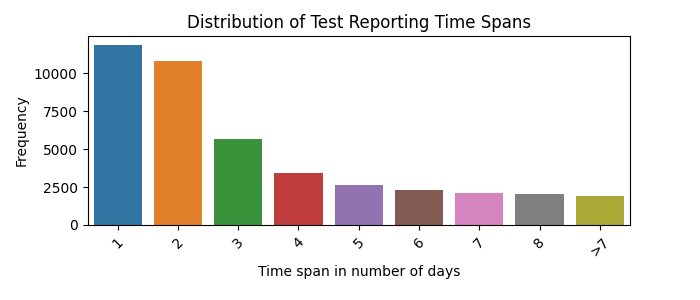

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Time span in number of days'),
 Text(0.5, 1.0, 'Distribution of Test Reporting Time Spans')]

In [36]:
plt.figure(figsize=(7,3))
plt.gcf().subplots_adjust(bottom=0.25)
chart = sns.barplot( [str(i) for i in col_values[0:8].values]+['>7'], col_counts[0:9]+[col_value_counts.values[9:].sum()]);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set(xlabel='Time span in number of days', ylabel='Frequency', title='Distribution of Test Reporting Time Spans')

###### Number of days since patient's episode started

Assuming that patients usually report their case somewhere close to when it started, these values allow us to gauge the likelihood of a resolved outcome given an episode start date.  

The mean value is from about two months ago during hte peak of the first wave of the pandemic. 

In [37]:
df['Days_since_episode_started'].describe()

count    31544.000000
mean        63.164057
std         23.106678
min         14.000000
25%         44.000000
50%         66.000000
75%         80.000000
max        176.000000
Name: Days_since_episode_started, dtype: float64

In [38]:
col_value_counts = df['Days_since_episode_started'].value_counts().sort_index()
col_values= col_value_counts.index
col_counts = col_value_counts.values


<IPython.core.display.Javascript object>


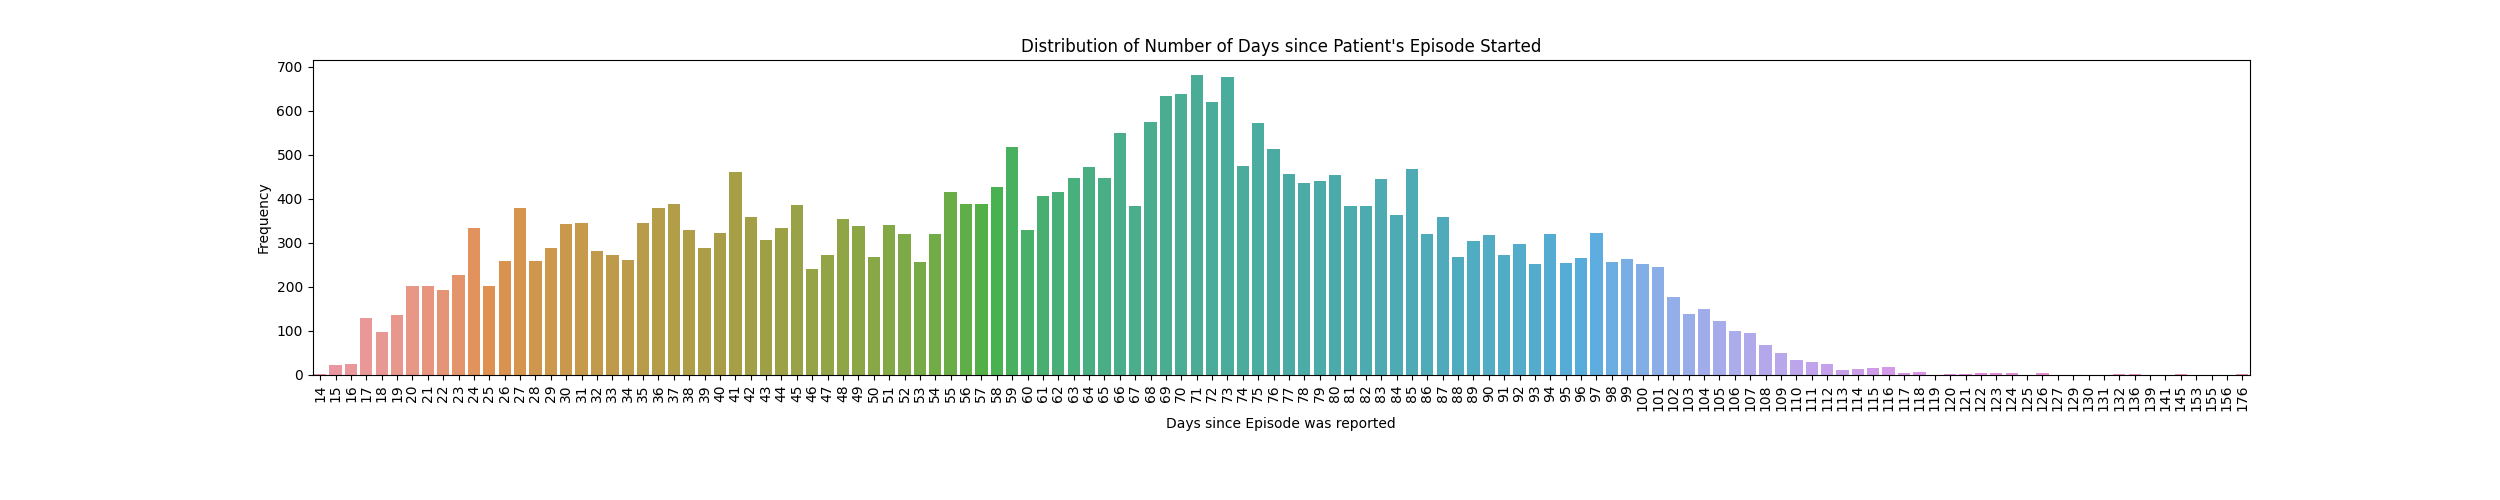

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Days since Episode was reported'),
 Text(0.5, 1.0, "Distribution of Number of Days since Patient's Episode Started")]

In [39]:
plt.figure(figsize=(25,5))
plt.gcf().subplots_adjust(bottom=0.25)
chart = sns.barplot( col_values, col_counts);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set(xlabel='Days since Episode was reported', ylabel='Frequency', title='Distribution of Number of Days since Patient\'s Episode Started')

##### Dates of specimen submission, test reporting, Accurate case date

The breakdown of the dates included for the different reporting attributes is shown below. The Earliest Accurate_Episode_Date is, interestingly, the first of January, 2020. However, the earliest test result report is the 27th of January, 2020.

In [40]:
date_cols = ['Accurate_Episode_Date', 'Case_Reported_Date',
        'Specimen_Date', 'Specimen_Date_Adjusted',
       'Test_Reported_Date']

In [41]:
for col in date_cols:
    print("\n-------------------------------------------\n",col,"\n-------------------------------------------")
    desc = df[col].describe()
    print("Number of unique dates reported: ", desc['unique'], "dates")
    print("Earliest date reported:\t", desc['first'].date())
    print("Lastest date reported:\t", desc['last'].date())
    print("Date with most reportings:", desc['top'].date(), "with ", desc['top'], "cases recorded on that date under", col)
  


-------------------------------------------
 Accurate_Episode_Date 
-------------------------------------------
Number of unique dates reported:  126 dates
Earliest date reported:	 2020-01-01
Lastest date reported:	 2020-06-11
Date with most reportings: 2020-04-15 with  2020-04-15 00:00:00 cases recorded on that date under Accurate_Episode_Date

-------------------------------------------
 Case_Reported_Date 
-------------------------------------------
Number of unique dates reported:  109 dates
Earliest date reported:	 2020-01-23
Lastest date reported:	 2020-06-10
Date with most reportings: 2020-04-17 with  2020-04-17 00:00:00 cases recorded on that date under Case_Reported_Date

-------------------------------------------
 Specimen_Date 
-------------------------------------------
Number of unique dates reported:  112 dates
Earliest date reported:	 2020-01-23
Lastest date reported:	 2020-06-09
Date with most reportings: 2020-04-13 with  2020-04-13 00:00:00 cases recorded on that dat

##### Outcomes

There are three possible outcomes in this report: Resolved, Not Resolved, and Fatal. The dataset is heavily skewed in the number of cases recorded as Resolved compared to Fatal and Not Resolved cases.

In [42]:
outcome_col_value_counts = df['Outcome1'].value_counts()
outcome_col_values= outcome_col_value_counts.index
outcome_col_counts = outcome_col_value_counts.values

<IPython.core.display.Javascript object>


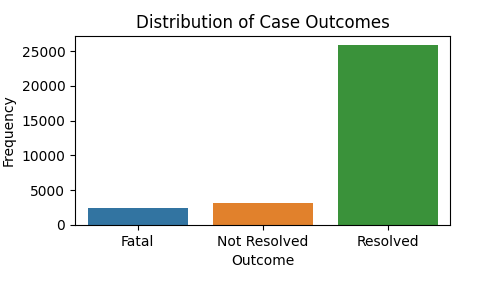

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Outcome'),
 Text(0.5, 1.0, 'Distribution of Case Outcomes')]

In [70]:
plt.figure(figsize=(5,3))
plt.gcf().subplots_adjust(bottom=0.25, left=0.15)
chart = sns.barplot(outcome_col_values, outcome_col_counts);
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
chart.set(xlabel='Outcome', ylabel='Frequency', title='Distribution of Case Outcomes')


In [44]:
df['Outcome1'].value_counts()

Resolved        25885
Not Resolved     3172
Fatal            2487
Name: Outcome1, dtype: int64

In [45]:
df['Outbreak_Related'].value_counts()

False    18895
True     12649
Name: Outbreak_Related, dtype: int64

In [46]:
outbreak_outcomes = df.loc[df['Outbreak_Related']==True]

In [47]:
outbreak_outcomes.head()

Row_ID Accurate_Episode_Date Accurate_Episode_Month  \
53       54            2020-03-09                      3   
259     260            2020-03-16                      3   
301     302            2020-03-15                      3   
359     360            2020-03-15                      3   
361     362            2020-03-16                      3   

     Days_since_episode_started Case_Reported_Date  Specimen_Submitted  \
53                          108         2020-03-11                True   
259                         101         2020-03-17                True   
301                         102         2020-03-17                True   
359                         102         2020-03-19                True   
361                         101         2020-03-19                True   

    Specimen_Date Specimen_Date_Adjusted Test_Reported_Date  \
53     2020-04-07             2020-04-07         2020-04-09   
259    2020-03-16             2020-03-16         2020-03-17   
301    2020-05-19             2020-05-19         2020-05-22   
359    2020-03-15             2020-03-15         2020-03-19   
361    2020-03-16             2020-03-16         2020-03-19   

     Time_to_Test_Reporting  ... Case_AcquisitionInfo  Outcome1  \
53                        2  ...              Neither  Resolved   
259                       1  ...              Neither     Fatal   
301                       3  ...              Neither  Resolved   
359                       4  ...              Neither  Resolved   
361                       3  ...              Neither  Resolved   

    Outbreak_Related                       Reporting_PHU  \
53              True  York Region Public Health Services   
259             True     Hamilton Public Health Services   
301             True  York Region Public Health Services   
359             True     Durham Region Health Department   
361             True     Durham Region Health Department   

            Reporting_PHU_Address Reporting_PHU_City  \
53             17250 Yonge Street          Newmarket   
259  110 King St. West, 2nd Floor           Hamilton   
301            17250 Yonge Street          Newmarket   
359        605 Rossland Road East             Whitby   
361        605 Rossland Road East             Whitby   

    Reporting_PHU_Postal_Code  \
53                    L3Y 6Z1   
259                   L8P 4S6   
301                   L3Y 6Z1   
359                   L1N 0B2   
361                   L1N 0B2   

                                 Reporting_PHU_Website Reporting_PHU_Latitude  \
53             www.york.ca/wps/portal/yorkhome/health/              44.048023   
259                       www.hamilton.ca/publichealth              43.257631   
301            www.york.ca/wps/portal/yorkhome/health/              44.048023   
359  www.durham.ca/en/health-and-wellness/health-an...              43.898605   
361  www.durham.ca/en/health-and-wellness/health-an...              43.898605   

    Reporting_PHU_Longitude  
53               -79.480239  
259              -79.871341  
301              -79.480239  
359              -78.940341  
361              -78.940341  

[5 rows x 22 columns]

In [57]:
outbreak_outcome_col_value_counts = outbreak_outcomes['Outcome1'].value_counts()
outbreak_outcome_col_values= outbreak_outcome_col_value_counts.index
outbreak_outcome_col_counts = outbreak_outcome_col_value_counts.values

<IPython.core.display.Javascript object>


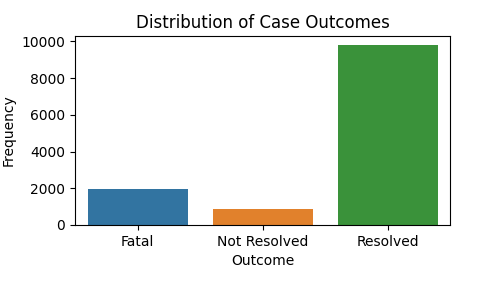

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Outcome'),
 Text(0.5, 1.0, 'Distribution of Case Outcomes')]

In [69]:
plt.figure(figsize=(5,3))
plt.gcf().subplots_adjust(bottom=0.25, left=0.15)
chart = sns.barplot(outbreak_outcome_col_values, outbreak_outcome_col_counts);
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
chart.set(xlabel='Outcome', ylabel='Frequency', title='Distribution of Case Outcomes')


In [73]:
outbreak_outcomes['Accurate_Episode_Month'].value_counts()

4    7997
5    3362
3     968
6     318
2       4
1       0
Name: Accurate_Episode_Month, dtype: int64

##### Age Group

In [47]:
col_value_counts = df['Age_Group'].value_counts()
col_values= col_value_counts.index
col_counts = col_value_counts.values

<IPython.core.display.Javascript object>


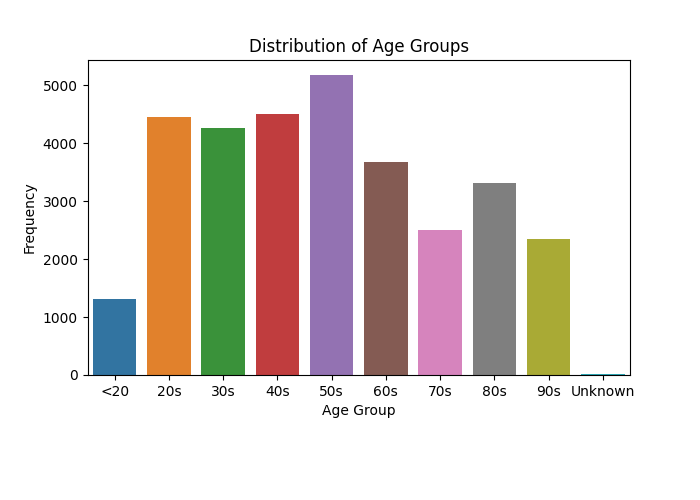

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Age Group'),
 Text(0.5, 1.0, 'Distribution of Age Groups')]

In [48]:
plt.figure(figsize=(7,5))
plt.gcf().subplots_adjust(bottom=0.25)
chart = sns.barplot(col_values, col_counts);
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
chart.set(xlabel='Age Group', ylabel='Frequency', title='Distribution of Age Groups')


In [49]:
df['Age_Group'].describe()

count     31544
unique       10
top         50s
freq       5173
Name: Age_Group, dtype: object

##### Location

Since each city has a single PHU reporting center with one address, we will use the city as a location indicator.

The number of cases reported in each city is very skewed with Toronto reporting the most cases at 11,853 cases, while smaller cities such as Liskeard reporting 18. The standard deviation in number of reported cases is 2178 with a mean of 927 and a meadian of 167. 

In [50]:
# Can we use the city as a representative of location? (yes if each city has a single reporting PHU)
cities = list(df['Reporting_PHU_City'].unique())
for city in cities:
    print("city:", city, " #PHUs:", len(df.loc[df['Reporting_PHU_City']==city, 'Reporting_PHU'].unique()))

city: Toronto  #PHUs: 1
city: London  #PHUs: 1
city: Newmarket  #PHUs: 1
city: Whitby  #PHUs: 1
city: Waterloo  #PHUs: 1
city: Mississauga  #PHUs: 1
city: Oakville  #PHUs: 1
city: Ottawa  #PHUs: 1
city: Sudbury  #PHUs: 1
city: Hamilton  #PHUs: 1
city: Cornwall  #PHUs: 1
city: Barrie  #PHUs: 1
city: Thorold  #PHUs: 1
city: Port Hope  #PHUs: 1
city: Stratford  #PHUs: 1
city: Kenora  #PHUs: 1
city: Peterborough  #PHUs: 1
city: Owen Sound  #PHUs: 1
city: Guelph  #PHUs: 1
city: Brantford  #PHUs: 1
city: Windsor  #PHUs: 1
city: Kingston  #PHUs: 1
city: Sault Ste. Marie  #PHUs: 1
city: Timmins  #PHUs: 1
city: Chatham  #PHUs: 1
city: Belleville  #PHUs: 1
city: St. Thomas  #PHUs: 1
city: New Liskeard  #PHUs: 1
city: North Bay  #PHUs: 1
city: Point Edward  #PHUs: 1
city: Brockville  #PHUs: 1
city: Simcoe  #PHUs: 1
city: Pembroke  #PHUs: 1
city: Thunder Bay  #PHUs: 1


In [51]:
df['Reporting_PHU_City'].value_counts()

Toronto             11853
Mississauga          5118
Newmarket            2679
Ottawa               1998
Whitby               1610
Waterloo             1165
Windsor              1105
Hamilton              740
Thorold               719
Oakville              690
London                567
Barrie                505
Guelph                412
Simcoe                395
Brockville            351
Point Edward          271
Port Hope             182
Cornwall              153
Chatham               148
Brantford             126
Owen Sound             93
Peterborough           91
Thunder Bay            85
St. Thomas             76
Timmins                65
Sudbury                64
Kingston               62
Stratford              56
Belleville             44
Pembroke               28
Kenora                 27
North Bay              27
Sault Ste. Marie       21
New Liskeard           18
Name: Reporting_PHU_City, dtype: int64

In [52]:
case_nums = df['Reporting_PHU_City'].value_counts()
case_nums.describe()

count       34.000000
mean       927.764706
std       2178.027966
min         18.000000
25%         64.250000
50%        167.500000
75%        711.750000
max      11853.000000
Name: Reporting_PHU_City, dtype: float64

In [53]:
loc_col_value_counts = df['Reporting_PHU_City'].value_counts().sort_values(ascending=False)
loc_col_values= loc_col_value_counts.index
loc_col_counts = loc_col_value_counts.values

<IPython.core.display.Javascript object>


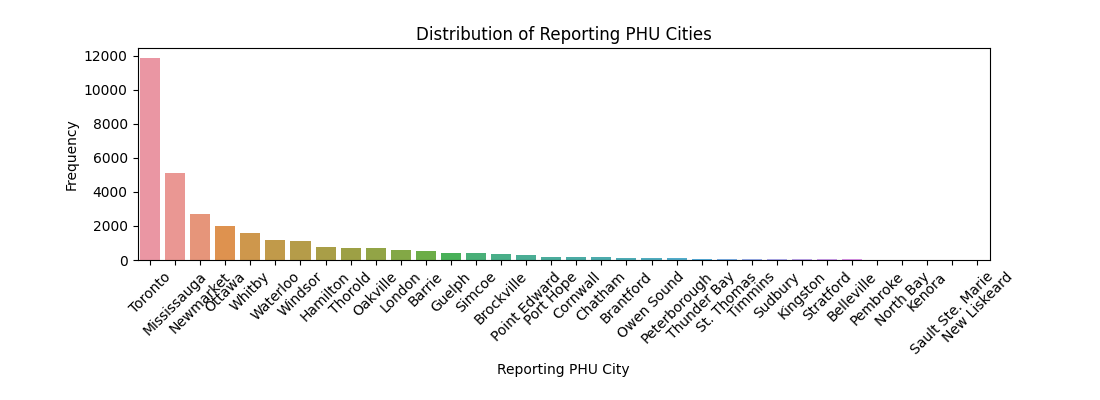

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Reporting PHU City'),
 Text(0.5, 1.0, 'Distribution of Reporting PHU Cities')]

In [54]:
plt.figure(figsize=(11,4))
plt.gcf().subplots_adjust(bottom=0.35)
chart = sns.barplot(loc_col_values, loc_col_counts, order=loc_col_values);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set(xlabel='Reporting PHU City', ylabel='Frequency', title='Distribution of Reporting PHU Cities')

##### Client's Gender

The dataset sample has mostly Male and Female genders with very few patients identifying as 'transgender' or 'other', and some 'unknown'. 

In [55]:
df['Client_Gender'].value_counts()

FEMALE         17106
MALE           14179
UNKNOWN          246
OTHER              8
TRANSGENDER        5
Name: Client_Gender, dtype: int64

In [56]:
gen_col_value_counts = df['Client_Gender'].value_counts()
gen_col_values= gen_col_value_counts.index
gen_col_counts = gen_col_value_counts.values

<IPython.core.display.Javascript object>


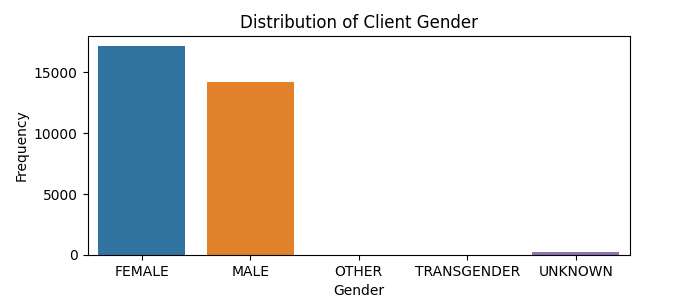

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Gender'),
 Text(0.5, 1.0, 'Distribution of Client Gender')]

In [57]:
plt.figure(figsize=(7,3))
plt.gcf().subplots_adjust(bottom=0.15)
chart = sns.barplot(gen_col_values, gen_col_counts);
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
chart.set(xlabel='Gender', ylabel='Frequency', title='Distribution of Client Gender')

### Exploring predictor and outcome correlations

We will now look at the correlation between the different attributes to identify potentially relevant attributes as well as redundant ones.

We will start by looking at the correlation between different categorical attributes. There are two different approaches to measure the correlation between categorical attributes: the first measures the correlation between the one-hot-encodings of the categories, while the second, called Cramer's V measure can handle categorical data directly making the resulting heatmap more readable. We will look at both approaches.

#### Categorical Data Correlation
###### Approach 1:Correlation of Categorical Data based on their One Hot Encodings



In [66]:
categorical_columns=['Outcome1','Accurate_Episode_Month', 'Specimen_Submitted', 'Age_Group', 'Client_Gender', 'Outbreak_Related', 'Reporting_PHU_City']
#oneHot_df = df[categorical_columns+['Outcome1']].copy()
oneHot_df = df[categorical_columns].copy()
for cat in categorical_columns:
    oneHot_df = pd.concat([oneHot_df, pd.get_dummies(df[cat], prefix=cat, drop_first=False)], axis=1).drop(cat, axis=1)


In [67]:
oneHot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31544 entries, 0 to 31543
Data columns (total 62 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Outcome1_Fatal                       31544 non-null  uint8
 1   Outcome1_Not Resolved                31544 non-null  uint8
 2   Outcome1_Resolved                    31544 non-null  uint8
 3   Accurate_Episode_Month_1             31544 non-null  uint8
 4   Accurate_Episode_Month_2             31544 non-null  uint8
 5   Accurate_Episode_Month_3             31544 non-null  uint8
 6   Accurate_Episode_Month_4             31544 non-null  uint8
 7   Accurate_Episode_Month_5             31544 non-null  uint8
 8   Accurate_Episode_Month_6             31544 non-null  uint8
 9   Specimen_Submitted_False             31544 non-null  uint8
 10  Specimen_Submitted_True              31544 non-null  uint8
 11  Age_Group_<20                        31544 non-null  u

<IPython.core.display.Javascript object>


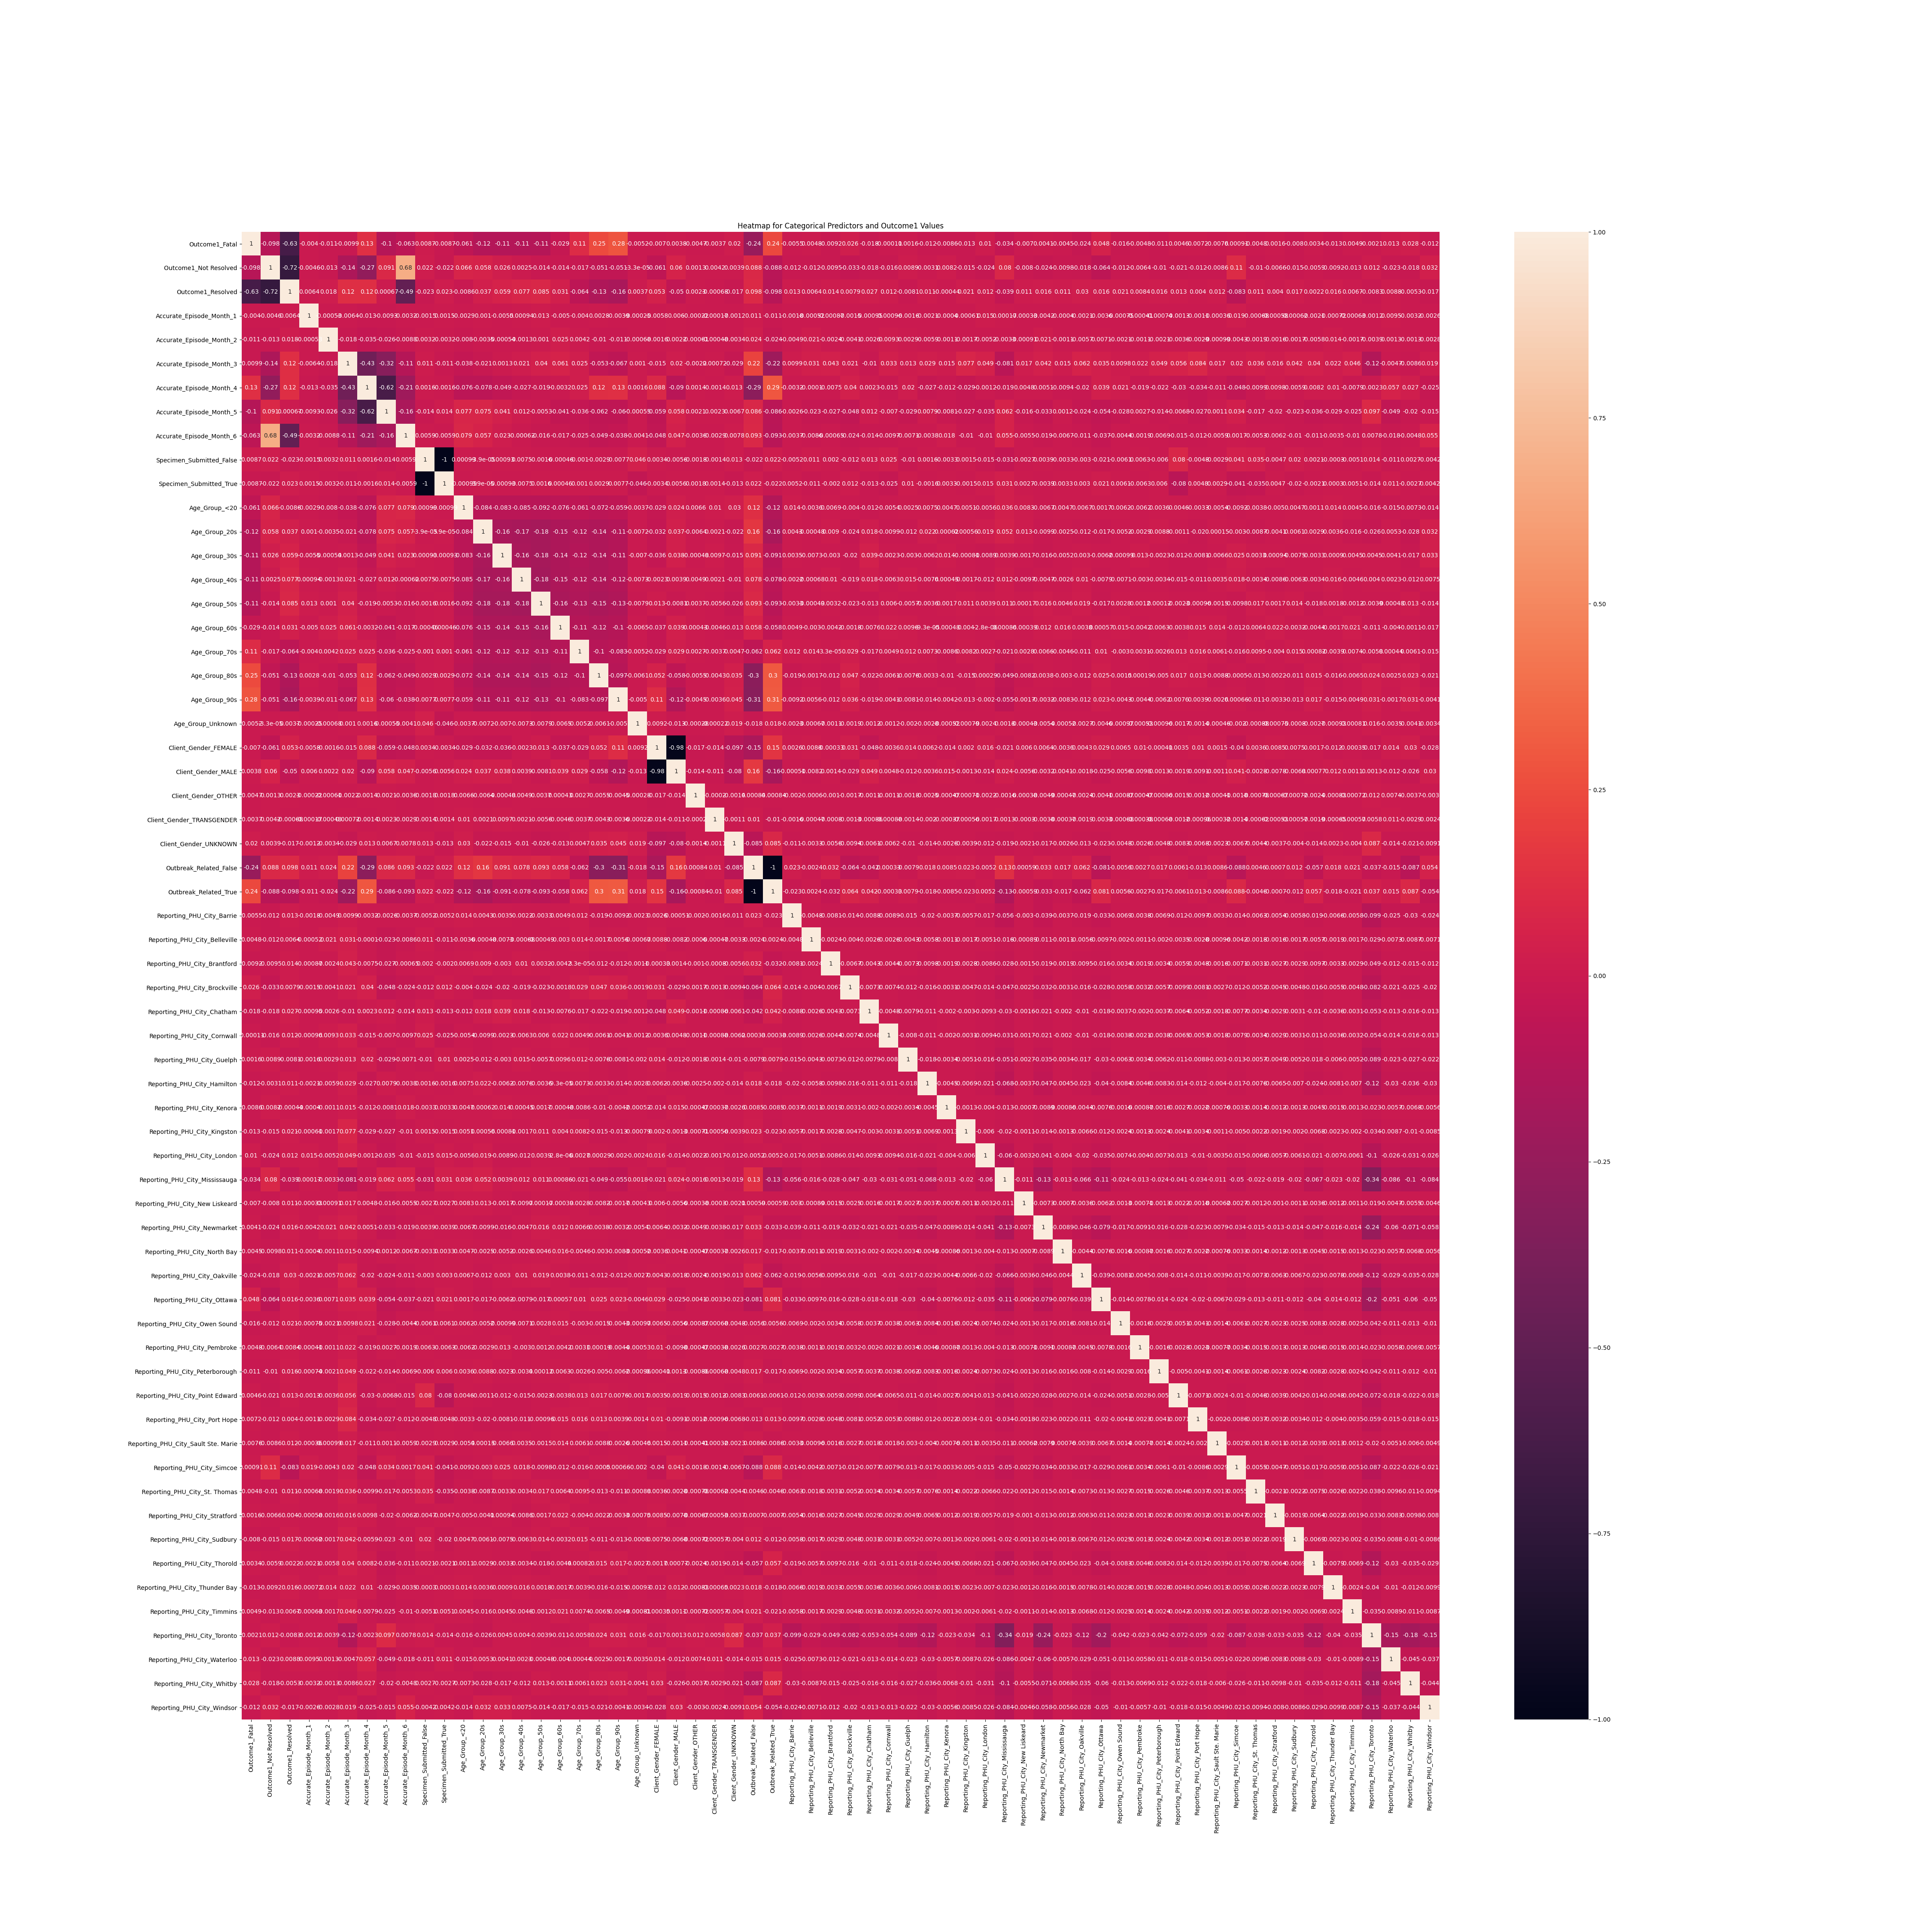

[Text(0.5, 1.0, 'Heatmap for Categorical Predictors and Outcome1 Values')]

In [68]:
plt.figure(figsize=(45,45))
corr = oneHot_df.corr()
ax = sns.heatmap(corr, annot=True)
ax.set(title= "Heatmap for Categorical Predictors and Outcome1 Values")

<IPython.core.display.Javascript object>


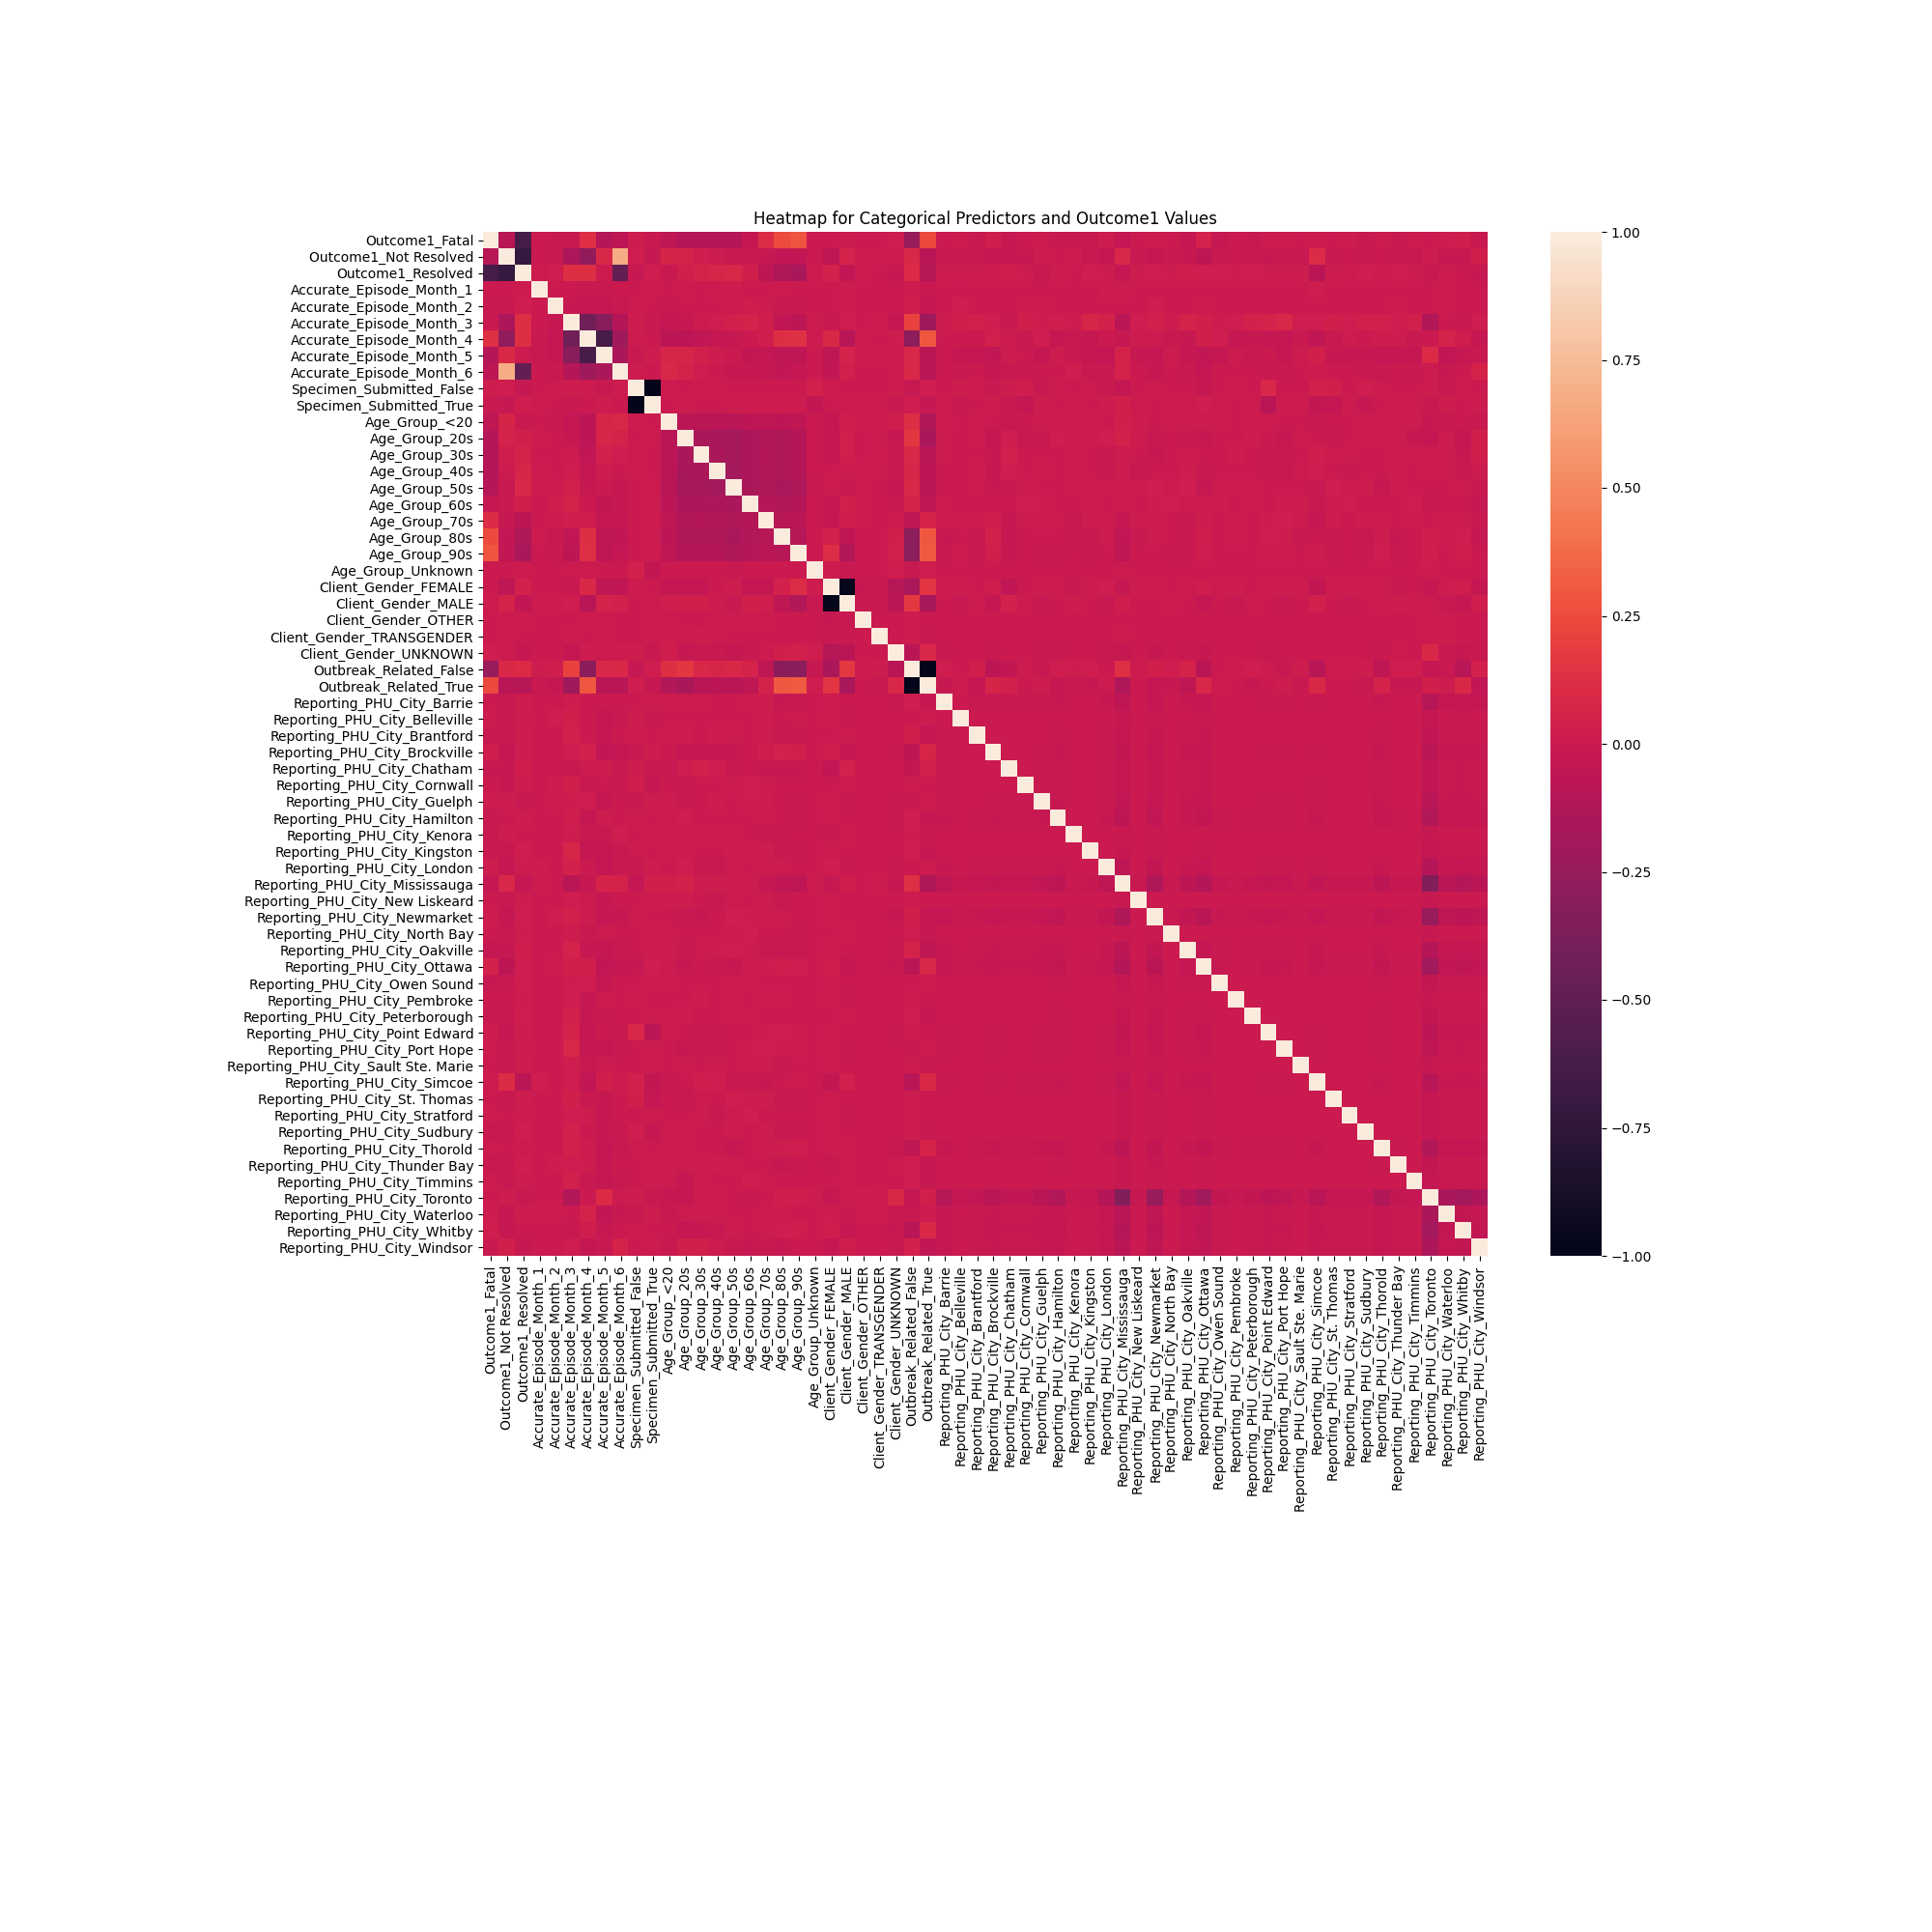

[Text(0.5, 1.0, 'Heatmap for Categorical Predictors and Outcome1 Values')]

In [69]:
plt.figure(figsize=(20,20))
plt.gcf().subplots_adjust(bottom=0.35, left=0.25)
ax = sns.heatmap(corr, annot=False)
ax.set(title= "Heatmap for Categorical Predictors and Outcome1 Values")

##### Observations
1. The outbreak_related True value is relatively highly correlated with the 80s and 90s age groups. This is probably related to nursing home outbreaks where the older age groups are more susceptible to the infection.
2. Interestingly, the Outcome is weakly related to any of the criteria in this map. The predictors here are unlikely to be useful in a predictive model that predicts the outcome.
3. The only exception to the previous point is negative correlation between the two highest age groups and Outcome1_Resolved and, to a lesser extent, the 70s age group. These age groups are also relatively highly related to the Fatal Outcome1 value, and to the Outbreak_related value. Outbreak_Related is also more correlated with St. Thomas than other cities. It turns out the city has declared an outbreak at a nursing home in St. Thomas during the reporting period of this dataset. 
4. A Fatal outcome is also more highly correlated with an Outbreak related case.
5. Beyond the 90s, 80s, and 70s age groups, a fatal outcome correlation is uniformally negative execpt for all age groups.Interestingly, the <20s age group has a weaker negative correlation with the fatal outcome than the others, perhaps because younger patients are mostly asymptomatic and only present when the infection is more serious than is the norm for that group. 
6. There is a high positive correlation between June as the month the case's Accurate Episode was recorded and the Not Resolved outcome reflecting the amount of time it takes COVID-19 patients to recover.
7. There is also a high negative correlation between June for Accurate_Episode_Month and the Resolved outcome, again reflecting that it takes many weeks for COVID-19 patients to recover so an episode that starts in June is unlikely to have resolved a couple of weeks later.

##### Approach 2: Cramer's V Correlation

Let us look at the correlations from another correlation measure: Cramer's V that can handle categorical variables more directly and returns the correlation values for the category as a whole.

This is a more concise map that again illustrates what we saw in the previous heatmap: there is very weak correlation between the predictors and the city/location and outcome. The highest correlation observed is between the age group and whether the case is outbreak related which is related to what the "Outbreak_Related" predictor is all about: identifying cases that stem from nursing home outbreaks. Age Group is also more correlated with outcome than other predictors as was observed in the previous heatmap where we saw a Fatal outcome more correlated with the 80s and 90s age group than other groups.

<IPython.core.display.Javascript object>


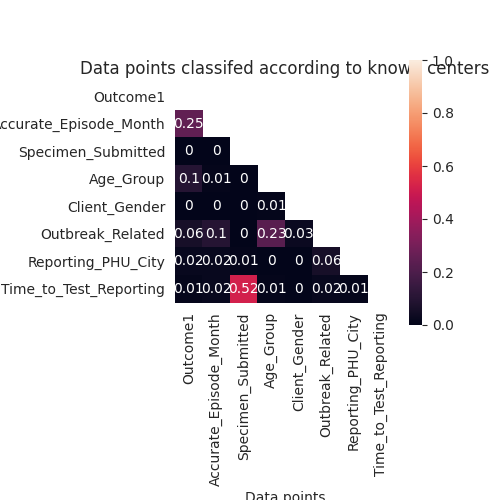

In [70]:
#####################################################################################################
# Please note that the contents of this cell are a (slightly modified) implementaiton of 
# the Cramer V correlation measure from Kaggle:
# https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix
#####################################################################################################

from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  ''' 
  Returns the Cramer's V correlation between two variables
  Source: https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix
  '''

  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table

  return (stat/(obs*mini))


categorical_columns=['Outcome1','Accurate_Episode_Month', 'Specimen_Submitted', 'Age_Group', 'Client_Gender', 'Outbreak_Related', 'Reporting_PHU_City']
other_columns=['Time_to_Test_Reporting']
columns_used = categorical_columns + other_columns
rows= []

# Find pairwise Cramer's V correlation values for all columns
for var1 in df[columns_used]:
  col = []
  for var2 in df[columns_used] :
    cramers =cramers_V(df[var1], df[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
# Create a dataframe containing the correlation values
cramers_results = np.array(rows)
cramers_df = pd.DataFrame(cramers_results, 
                          columns = df[columns_used].columns, 
                          index =df[columns_used].columns)

# Plot the bottom half of the correlation (the value are symmetrical)
mask = np.zeros_like(cramers_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(5,5))
plt.gcf().subplots_adjust(bottom=0.35,left=0.35)

with sns.axes_style("white"):
  ax = sns.heatmap(cramers_df, mask=mask,vmin=0., vmax=1, square=True, annot=True)

plt.show()


### Visualizing Clusters in the Dataset

In this section we use the K-Modes method to visualize the categorical data in this dataset. Given the weak pairwise correllation we have seen in the previous section, I do not expect clusters with strong inter-cluster connections but some of the clusters may reveal the relations between whether or not a case is related to an outbreak, the age group of the patient, and the month during which the case started.


#### K-Modes Clustering of Categorical Data

These clusters (profiles) can help us predict the outcome or location of a patient given his/her other category values. The scatter plot at the end of this section shows an interesting concentration of the 'Fatal' outcome cases into three clusters. The two other outcome types however are scattered in all clusters. Given the cross-correlation between categories that we saw earlier, I would still be wary of these predictions. 

The cost returned by the clustering algorithm are very high. Perhaps running an exhaustive search on all categories, removing one at a time, my help reduce the noise. 

In [139]:
categorical_columns=['Age_Group', 'Accurate_Episode_Month', 'Client_Gender', 'Outbreak_Related', 'Reporting_PHU_City']
cat_df = df[categorical_columns+['Outcome1']].copy()

In [140]:
from kmodes.kmodes import KModes

# define the k-modes model
km = KModes(n_clusters=45, init='Huang', n_init=11, verbose=1)
# fit the clusters to the skills dataframe
clusters = km.fit_predict(cat_df)
# get cluster modes
kmodes = km.cluster_centroids_



Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1474, cost: 38619.0
Run 1, iteration: 2/100, moves: 579, cost: 38619.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3567, cost: 39344.0
Run 2, iteration: 2/100, moves: 0, cost: 39344.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3864, cost: 37540.0
Run 3, iteration: 2/100, moves: 506, cost: 37540.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 4811, cost: 39783.0
Run 4, iteration: 2/100, moves: 1064, cost: 39337.0
Run 4, iteration: 3/100, moves: 533, cost: 39337.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 5441, cost: 38109.0
Run 5, iteration: 2/100, moves: 348, cost: 38109.0
Init: initializing centroids
Init: 

In [143]:
print("Cost:", km.cost_)

Cost: 37399.0


In [144]:
for i in range(kmodes.shape[0]):
    if len(kmodes[i,:]) == 0:
        print("\ncluster " + str(i) + ": ")
        print("****Empty!****")
    else:
        print("\nProfile " + str(i) + ": ")
        print("----------")
        cent = kmodes[i,:]
        i=0
        for j in cat_df.columns[np.nonzero(cent)]:
            print(j, ":", cent[i])
            i +=1


Profile 0: 
----------
Age_Group : 30s
Accurate_Episode_Month : 4
Client_Gender : MALE
Outbreak_Related : True
Reporting_PHU_City : Toronto
Outcome1 : Resolved

Profile 1: 
----------
Age_Group : 60s
Accurate_Episode_Month : 5
Client_Gender : MALE
Outbreak_Related : False
Reporting_PHU_City : Mississauga
Outcome1 : Resolved

Profile 2: 
----------
Age_Group : 90s
Accurate_Episode_Month : 5
Client_Gender : FEMALE
Outbreak_Related : True
Reporting_PHU_City : Ottawa
Outcome1 : Resolved

Profile 3: 
----------
Age_Group : 50s
Accurate_Episode_Month : 5
Client_Gender : FEMALE
Outbreak_Related : True
Reporting_PHU_City : Toronto
Outcome1 : Resolved

Profile 4: 
----------
Age_Group : 50s
Accurate_Episode_Month : 3
Client_Gender : MALE
Outbreak_Related : False
Reporting_PHU_City : Ottawa
Outcome1 : Resolved

Profile 5: 
----------
Age_Group : 80s
Accurate_Episode_Month : 3
Client_Gender : FEMALE
Outbreak_Related : True
Reporting_PHU_City : Toronto
Outcome1 : Resolved

Profile 6: 
----------


In [145]:
cat_df['index'] = cat_df.index
cat_df['cluster']=clusters

<IPython.core.display.Javascript object>


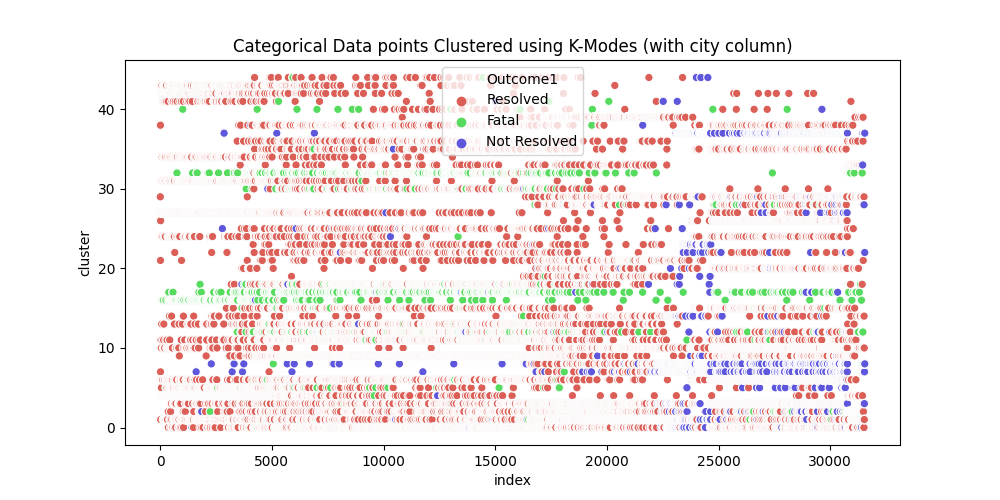

In [146]:
# Clustered result
plt.figure(figsize=(10,5))
scatter = sns.scatterplot(x="index", y="cluster", 
                          hue="Outcome1",
                          palette=sns.color_palette("hls", 3),
                          data = cat_df)
scatter.set_title('Categorical Data points Clustered using K-Modes (with city column)')
plt.show()

##### Clustering with less Categories

Our last clustering used several different classes but the costs of each clustering run were high indicating that the cluster elements are not tightly clustered. Removing the city information helped cluster the 'Fatal' outcome further into one cluster, and two other clusters were overwhelmingly 'Not Resolved' cases.

In [147]:
categorical_columns=['Accurate_Episode_Month', 'Age_Group', 'Client_Gender', 'Outbreak_Related']
cat_df = df[categorical_columns+['Outcome1']].copy()


In [148]:
from kmodes.kmodes import KModes

# define the k-modes model
km = KModes(n_clusters=45, init='Huang', n_init=11, verbose=1)
# fit the clusters to the skills dataframe
clusters = km.fit_predict(cat_df)
# get cluster modes
kmodes = km.cluster_centroids_



Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1211, cost: 18772.0
Run 1, iteration: 2/100, moves: 14, cost: 18772.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 654, cost: 19822.0
Run 2, iteration: 2/100, moves: 532, cost: 19749.0
Run 2, iteration: 3/100, moves: 167, cost: 19749.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2024, cost: 19520.0
Run 3, iteration: 2/100, moves: 554, cost: 19485.0
Run 3, iteration: 3/100, moves: 8, cost: 19485.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 5336, cost: 19065.0
Run 4, iteration: 2/100, moves: 188, cost: 18879.0
Run 4, iteration: 3/100, moves: 704, cost: 18669.0
Run 4, iteration: 4/100, moves: 78, cost: 18669.0
Init: initializing centroids
Init: initializing clusters
Starting ite

In [149]:
print("Cost:", km.cost_)

Cost: 17440.0


In [150]:
for i in range(kmodes.shape[0]):
    if len(kmodes[i,:]) == 0:
        print("\ncluster " + str(i) + ": ")
        print("****Empty!****")
    else:
        print("\nProfile " + str(i) + ": ")
        print("----------")
        cent = kmodes[i,:]
        k=0
        res=cat_df
        for j in cat_df.columns[np.nonzero(cent)]:
            print(j, ":", cent[k])
            k +=1



Profile 0: 
----------
Accurate_Episode_Month : 4
Age_Group : 50s
Client_Gender : FEMALE
Outbreak_Related : False
Outcome1 : Resolved

Profile 1: 
----------
Accurate_Episode_Month : 4
Age_Group : 60s
Client_Gender : FEMALE
Outbreak_Related : False
Outcome1 : Resolved

Profile 2: 
----------
Accurate_Episode_Month : 5
Age_Group : 30s
Client_Gender : FEMALE
Outbreak_Related : False
Outcome1 : Resolved

Profile 3: 
----------
Accurate_Episode_Month : 3
Age_Group : 20s
Client_Gender : FEMALE
Outbreak_Related : False
Outcome1 : Resolved

Profile 4: 
----------
Accurate_Episode_Month : 4
Age_Group : 80s
Client_Gender : MALE
Outbreak_Related : True
Outcome1 : Resolved

Profile 5: 
----------
Accurate_Episode_Month : 4
Age_Group : 50s
Client_Gender : FEMALE
Outbreak_Related : True
Outcome1 : Resolved

Profile 6: 
----------
Accurate_Episode_Month : 5
Age_Group : <20
Client_Gender : MALE
Outbreak_Related : False
Outcome1 : Resolved

Profile 7: 
----------
Accurate_Episode_Month : 4
Age_Group 

In [151]:
cat_df['index'] = cat_df.index
cat_df['cluster']=clusters

<IPython.core.display.Javascript object>


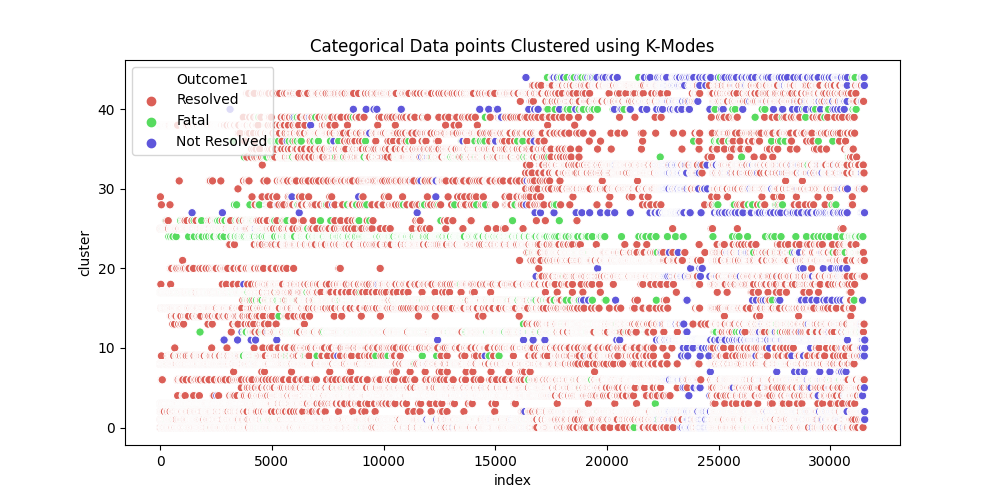

In [152]:
# Clustered result
plt.figure(figsize=(10,5))
scatter = sns.scatterplot(x="index", y="cluster", 
                          hue="Outcome1",
                          palette=sns.color_palette("hls", 3),
                          data = cat_df)
scatter.set_title('Categorical Data points Clustered using K-Modes')
plt.show()

Costs are lower but the cluster profiles are very similar.

### K-Prototype Clustering for Mixed Data

We also look at the clusters produced by the K-Prototype algorithm which can handle data containing both numerical and categorical data as is the case in this dataset. 

As the scatter plot in this section illustrates, 'Fatal' and 'Resolved' outcomes are still scattered and not confined to specific clusters. 'Not Resolved' cases, however, seem to be concentrated mostly in a single cluster. Adding numerical data regarding the time it took to report test results and the number of days that have passed since the start of the COVID episode for the patient allowed us to cluster most Not Resolved cases in a single cluster. Note that the data used here still contains the reporting PHU city data as in the first K-Modes clustering result but with significantly less clusters.

In [155]:
categorical_columns=['Age_Group', 'Accurate_Episode_Month', 'Client_Gender', 'Outbreak_Related', 'Reporting_PHU_City']
num_columns= ['Time_to_Test_Reporting', 'Days_since_episode_started']

kproto_df = df[categorical_columns+['Outcome1']+ num_columns].copy()

In [156]:
from kmodes.kprototypes import KPrototypes

# define the k-modes model
kproto = KPrototypes(n_clusters=25, init='Cao', verbose=2)
# fit the clusters to the skills dataframe
kproto_clusters = kproto.fit_predict(kproto_df, categorical=list(range(0,6)))


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 11832, ncost: 1571055.2217045396
Run: 1, iteration: 2/100, moves: 4493, ncost: 1525520.3921063764
Run: 1, iteration: 3/100, moves: 1641, ncost: 1512054.8871734876
Run: 1, iteration: 4/100, moves: 891, ncost: 1505598.5510755247
Run: 1, iteration: 5/100, moves: 812, ncost: 1500470.0468320544
Run: 1, iteration: 6/100, moves: 520, ncost: 1499483.6144425536
Run: 1, iteration: 7/100, moves: 278, ncost: 1498995.5218669476
Run: 1, iteration: 8/100, moves: 108, ncost: 1498840.9861250063
Run: 1, iteration: 9/100, moves: 6, ncost: 1498840.470023583
Run: 1, iteration: 10/100, moves: 0, ncost: 1498840.470023583
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clust

Run: 6, iteration: 5/100, moves: 948, ncost: 1522300.2609731895
Run: 6, iteration: 6/100, moves: 529, ncost: 1521299.0003864076
Run: 6, iteration: 7/100, moves: 546, ncost: 1519764.9182366885
Run: 6, iteration: 8/100, moves: 551, ncost: 1518792.2828648633
Run: 6, iteration: 9/100, moves: 421, ncost: 1517900.644371373
Run: 6, iteration: 10/100, moves: 578, ncost: 1516407.093594369
Run: 6, iteration: 11/100, moves: 662, ncost: 1513540.3385273942
Run: 6, iteration: 12/100, moves: 733, ncost: 1511092.093961638
Run: 6, iteration: 13/100, moves: 622, ncost: 1510005.0342623056
Run: 6, iteration: 14/100, moves: 80, ncost: 1509982.4154270247
Run: 6, iteration: 15/100, moves: 326, ncost: 1509142.116878852
Run: 6, iteration: 16/100, moves: 203, ncost: 1508904.6810880757
Run: 6, iteration: 17/100, moves: 346, ncost: 1508379.6517916967
Run: 6, iteration: 18/100, moves: 315, ncost: 1507551.5634282958
Run: 6, iteration: 19/100, moves: 152, ncost: 1507425.6526947422
Run: 6, iteration: 20/100, moves: 1

In [157]:
# get cluster modes
kp_info = kproto.cluster_centroids_

print("cost:", kproto.cost_)

cost: 1428832.1027862353


In [158]:
for i in range(kp_info[0].shape[0]):
    cluster_cent = kp_info[1][i].tolist()
    cluster_cent = cluster_cent + kp_info[0][i].tolist() # join the numerical and categorical centroids
    if len(cluster_cent) == 0:
        print("\ncluster " + str(i) + ": ")
        print("****Empty!****")
    else:
        print("\nProfile " + str(i) + ": ")
        print("----------")
        k=0
        res=kproto_df
        for j in kproto_df.columns[np.nonzero(cluster_cent)]:
            print(j, ":", cluster_cent[k])
            k +=1



Profile 0: 
----------
Age_Group : 50s
Accurate_Episode_Month : 4
Client_Gender : FEMALE
Outbreak_Related : False
Reporting_PHU_City : Toronto
Outcome1 : Resolved
Time_to_Test_Reporting : 1.81784107946027
Days_since_episode_started : 51.848575712143926

Profile 1: 
----------
Age_Group : 40s
Accurate_Episode_Month : 4
Client_Gender : MALE
Outbreak_Related : True
Reporting_PHU_City : Mississauga
Outcome1 : Resolved
Time_to_Test_Reporting : 2.1588486140724945
Days_since_episode_started : 51.28038379530917

Profile 2: 
----------
Age_Group : 20s
Accurate_Episode_Month : 5
Client_Gender : MALE
Outbreak_Related : False
Reporting_PHU_City : Toronto
Outcome1 : Not Resolved
Time_to_Test_Reporting : 2.4405594405594404
Days_since_episode_started : 20.28951048951049

Profile 3: 
----------
Age_Group : 80s
Accurate_Episode_Month : 4
Client_Gender : FEMALE
Outbreak_Related : True
Reporting_PHU_City : Toronto
Outcome1 : Resolved
Time_to_Test_Reporting : 2.1617210682492582
Days_since_episode_started

In [159]:
kproto_df['index'] = kproto_df.index
kproto_df['cluster']=kproto_clusters

<IPython.core.display.Javascript object>


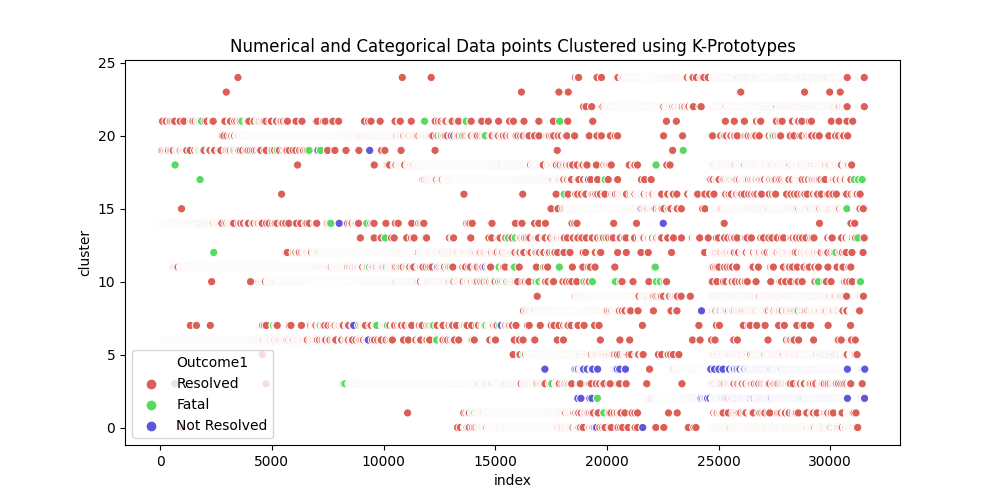

In [160]:
# Clustered result
plt.figure(figsize=(10,5))
scatter = sns.scatterplot(x="index", y="cluster", 
                          hue="Outcome1",
                          palette=sns.color_palette("hls", 3),
                          data = kproto_df)
scatter.set_title('Numerical and Categorical Data points Clustered using K-Prototypes')
plt.show()

## Predicting A Client's Expected Outcome

There are several approaches that we can use to predict a client's outcome given his/her infromation (age, gender, whether or not his case is related to an outbreak, reporting public health unit):

1. Random Forest: This is a supervised learning approach that does not need manual feature selection and has been found to be an effective classification algorithm. It can handle multiple data types as is the case in this dataset (testing dates (which can be further summarized by month and year), time spans, age categories, etc.)
2. K-Modes clustering. We have already created clusters in the previous section. Given a patient's profile, we can find the most similar cluster/profile and predict the outcome or location from that. 
3. K-Prototypes case also be used in a manner similar to K-Modes. 
3. Multi-layer Perceptron Classifier (MLPClassifier): a mulilayer neural network that can learn complex functions to classify the input into any of two of more categories. We can also use GridSearchCV to find the optimal hyperparameters for our network).

##### Creating our Train and Test Sets

Given what we have learnt so far about the distribution of our attributes, potentially useful attributes, the correlation between the different attributes, we can now create a dataset to be used in predicting the expected outcome for a given patient or their location.

Issues to consider:
1. The patient outcome class is highly unbalanced with many more Resolved cases than Fatal. We need to use stratified dataset splitting approach. 
2. The different PHU address components (name, city, postal code, longitude and latitude) are equivalent since every city has a single reporting PHU with a single street address. Therefor, we will only use the city as our location indicator.
3. Some cities report many more cases that others. We need to be mindful of that when splitting the training data in case the outcome has some corrolation with the city (we did see a slightly higher corrolation with St. Thomas)

## Splitting the Dataset

*  To train our models we need to split the dataset into train and test sets (the train will be used as the source for a validation set during training). 
* Given the small size of the dataset, The split will be 80% training and 20% testing.
* The outcome and location values are both unbalanced. Therefor, we need to combine the two labels, then use stratified splitting on the resulting joint labels. We will not use this joint label after that.

### Creating the train/test split

In [161]:
def dump_data(filename, data_var):
    import pickle

    with open(filename,"wb") as f:
            pickle.dump( data_var, f)

##### Train/test split for outcome prediction

In [222]:

outcome_target_cat='Outcome1'
outcome_categorical_columns = ['Accurate_Episode_Month', 'Specimen_Submitted', 'Age_Group', 'Client_Gender',
              'Outbreak_Related', 'Case_AcquisitionInfo',
              'Reporting_PHU_City']
num_columns= ['Time_to_Test_Reporting', 'Days_since_episode_started']


In [223]:
from sklearn.model_selection import train_test_split

outcome_df = df.copy()
# Create a column that combines the PHU city and the outcome.
outcome_df['city_outcome'] = outcome_df['Reporting_PHU_City'].astype(str) + "_" + outcome_df[outcome_target_cat].astype(str)

outcome_target = outcome_df.pop(outcome_target_cat).to_frame()
outcome_predictors_df = outcome_df


In [224]:
# Some city-outcome combinations occur only once (such as when a city has had a single fatal outcome).
# Here we combine city-outcome values that have a single occurrence as a mixed category called 'multi'
# This will not affect the model but will fix the singlton city-outcome occurrences and 
# allow us to do a stratifies split on the dataframe
l = list(zip(outcome_df['city_outcome'].value_counts().index, outcome_df['city_outcome'].value_counts().values))
for city, val in l:
    if val==1:
        outcome_df.loc[outcome_df['city_outcome']==city, 'city_outcome'] = 'multi'

In [225]:
# Ensure that we do not have any singlton values
outcome_df['city_outcome'].value_counts()

Toronto_Resolved           9678
Mississauga_Resolved       4028
Newmarket_Resolved         2253
Ottawa_Resolved            1688
Whitby_Resolved            1307
                           ... 
Chatham_Not Resolved          3
St. Thomas_Not Resolved       3
Peterborough_Fatal            2
Sudbury_Fatal                 2
Brockville_Not Resolved       2
Name: city_outcome, Length: 86, dtype: int64

<IPython.core.display.Javascript object>


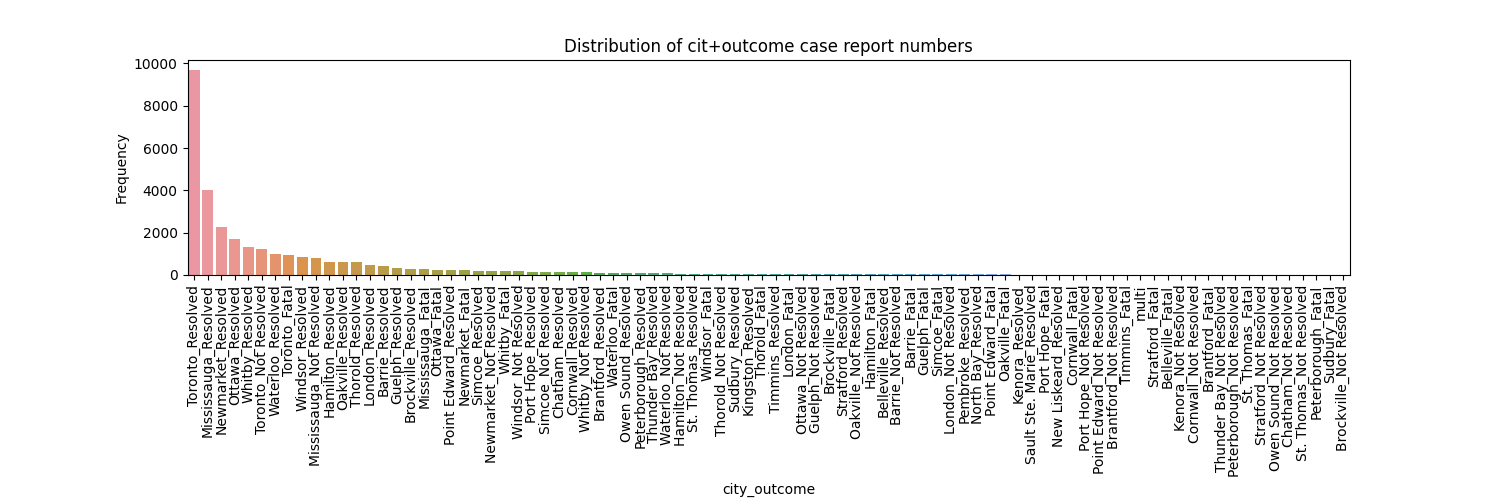

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'city_outcome'),
 Text(0.5, 1.0, 'Distribution of cit+outcome case report numbers')]

In [226]:
plt.figure(figsize=(15,5))
plt.gcf().subplots_adjust(bottom=0.45)
chart = sns.barplot(outcome_df['city_outcome'].value_counts().index, 
                    outcome_df['city_outcome'].value_counts().values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set(xlabel='city_outcome', ylabel='Frequency', title='Distribution of cit+outcome case report numbers')

In [228]:
outcome_df['city_outcome'].value_counts().describe()

count      86.000000
mean      366.790698
std      1163.559439
min         2.000000
25%        18.250000
50%        59.000000
75%       210.250000
max      9678.000000
Name: city_outcome, dtype: float64

In [229]:
X_outcome_train, X_outcome_test,Y_outcome_train, Y_outcome_test = train_test_split(outcome_predictors_df, outcome_target, test_size=0.2, random_state=0, stratify=outcome_df[['city_outcome']])

In [230]:
print(" we have ", X_outcome_train.shape[0], " samples in the training set, and ", X_outcome_test.shape[0], "samples in the test set.")

 we have  25235  samples in the training set, and  6309 samples in the test set.


In [283]:
Y_outcome_train['Outcome1'].value_counts()

Resolved        20707
Not Resolved     2537
Fatal            1991
Name: Outcome1, dtype: int64

In [284]:
Y_outcome_test['Outcome1'].value_counts()

Resolved        5178
Not Resolved     635
Fatal            496
Name: Outcome1, dtype: int64

##### Downsampling the data

In [364]:
num_samples =1500

downsampling_outcome_df = df.copy()
# Create a column that combines the PHU city and the outcome.
downsampling_outcome_df['city_outcome'] = downsampling_outcome_df['Reporting_PHU_City'].astype(str) + "_" + downsampling_outcome_df[outcome_target_cat].astype(str)

# Some city-outcome combinations occur only once (such as when a city has had a single fatal outcome).
# Here we combine city-outcome values that have a single occurrence as a mixed category called 'multi'
# This will not affect the model but will fix the singlton city-outcome occurrences and 
# allow us to do a stratifies split on the dataframe
l = list(zip(downsampling_outcome_df['city_outcome'].value_counts().index, downsampling_outcome_df['city_outcome'].value_counts().values))
for city, val in l:
    if val==1:
        downsampling_outcome_df.loc[downsampling_outcome_df['city_outcome']==city, 'city_outcome'] = 'multi'
        
copy_df = pd.DataFrame()
copy_df = downsampling_outcome_df.loc[downsampling_outcome_df['city_outcome']=='Toronto_Resolved'].sample(n=num_samples).copy()
copy_df = copy_df.append(downsampling_outcome_df.loc[downsampling_outcome_df['city_outcome']=='Mississauga_Resolved'].sample(n=num_samples).copy())
copy_df = copy_df.append(downsampling_outcome_df.loc[~downsampling_outcome_df['city_outcome'].isin(['Mississauga_Resolved', 'Toronto_Resolved'])].copy())

In [365]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20838 entries, 16651 to 31543
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Row_ID                      20838 non-null  int64         
 1   Accurate_Episode_Date       20838 non-null  datetime64[ns]
 2   Accurate_Episode_Month      20838 non-null  category      
 3   Days_since_episode_started  20838 non-null  int64         
 4   Case_Reported_Date          20838 non-null  datetime64[ns]
 5   Specimen_Submitted          20838 non-null  bool          
 6   Specimen_Date               20562 non-null  datetime64[ns]
 7   Specimen_Date_Adjusted      20838 non-null  datetime64[ns]
 8   Test_Reported_Date          20456 non-null  datetime64[ns]
 9   Time_to_Test_Reporting      20838 non-null  int64         
 10  Age_Group                   20838 non-null  category      
 11  Client_Gender               20838 non-null  catego

In [366]:
downsampled_outcome_target = copy_df.pop(outcome_target_cat).to_frame()
downsampled_outcome_predictors_df = copy_df

In [367]:
len(downsampled_outcome_predictors_df)

20838

In [368]:
len(downsampled_outcome_target)

20838

In [369]:
X_downsampled_outcome_train, X_downsampled_outcome_test,Y_downsampled_outcome_train, Y_downsampled_outcome_test = train_test_split(downsampled_outcome_predictors_df, downsampled_outcome_target, test_size=0.2, random_state=0, stratify=copy_df['city_outcome'])

In [370]:
print(" we have ", X_downsampled_outcome_train.shape[0], " samples in the training set, and ", X_downsampled_outcome_test.shape[0], "samples in the test set.")

 we have  16670  samples in the training set, and  4168 samples in the test set.


#### Train/test split for location prediction

In [168]:
from sklearn.model_selection import train_test_split

loc_target_cat='Reporting_PHU_City'
loc_categorical_columns = ['Accurate_Episode_Month', 'Specimen_Submitted', 'Age_Group', 'Client_Gender',
              'Outbreak_Related', 'Case_AcquisitionInfo', 
              'Outcome1']

loc_df = df.copy()
# Create a column that combines the PHU city and the outcome.
loc_df['city_outcome'] = loc_df['Reporting_PHU_City'].astype(str) + "_" + loc_df[loc_target_cat].astype(str)

loc_target = loc_df.pop(loc_target_cat).to_frame()
loc_predictors_df = loc_df


In [169]:
# Some city-outcome combination occur only once (such as when a city has had a single fatal outcome).
# Here we combine city-outcome values that have a single occurrence as a mixed category called 'multi'
# This will not affect the model but will fix the singlton city-outcome occurrences and 
# allow us to do a stratifies split on the dataframe
l = list(zip(loc_df['city_outcome'].value_counts().index, loc_df['city_outcome'].value_counts().values))
for city, val in l:
    if val==1:
        loc_df.loc[loc_df['city_outcome']==city, 'city_outcome'] = 'multi'

In [170]:
# Ensure that we do not have any singlton values
loc_df['city_outcome'].value_counts()

Toronto_Toronto                      11853
Mississauga_Mississauga               5118
Newmarket_Newmarket                   2679
Ottawa_Ottawa                         1998
Whitby_Whitby                         1610
Waterloo_Waterloo                     1165
Windsor_Windsor                       1105
Hamilton_Hamilton                      740
Thorold_Thorold                        719
Oakville_Oakville                      690
London_London                          567
Barrie_Barrie                          505
Guelph_Guelph                          412
Simcoe_Simcoe                          395
Brockville_Brockville                  351
Point Edward_Point Edward              271
Port Hope_Port Hope                    182
Cornwall_Cornwall                      153
Chatham_Chatham                        148
Brantford_Brantford                    126
Owen Sound_Owen Sound                   93
Peterborough_Peterborough               91
Thunder Bay_Thunder Bay                 85
St. Thomas_

In [219]:
X_loc_train, X_loc_test, Y_loc_train, Y_loc_test = train_test_split(loc_predictors_df, loc_target, test_size=0.2, random_state=0, stratify=loc_df[['city_outcome']])

NameError: name 'loc_predictors_df' is not defined

In [172]:
print(" we have ", X_loc_train.shape[0], " samples in the training set, and ", X_loc_test.shape[0], "samples in the test set.")

 we have  25235  samples in the training set, and  6309 samples in the test set.


### K-Modes Train/Test Split

For the K-Modes algorithm, we do not need to one hot encode the data. But we can only use categorical data. We still should stratify the train and test set splits to make sure we have different outcomt results represented in both sets.

##### Outcome Prediction

In [173]:
X_kmodes_outcome_train, X_kmodes_outcome_test,Y_kmodes_outcome_train, Y_kmodes_outcome_test = X_outcome_train[outcome_categorical_columns].copy(), X_outcome_test[outcome_categorical_columns].copy(),Y_outcome_train.copy(), Y_outcome_test.copy() 

In [174]:
X_kmodes_outcome_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25235 entries, 11345 to 11903
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Accurate_Episode_Month  25235 non-null  category
 1   Specimen_Submitted      25235 non-null  bool    
 2   Age_Group               25235 non-null  category
 3   Client_Gender           25235 non-null  category
 4   Outbreak_Related        25235 non-null  bool    
 5   Case_AcquisitionInfo    25235 non-null  category
 6   Reporting_PHU_City      25235 non-null  category
dtypes: bool(2), category(5)
memory usage: 372.1 KB


In [175]:
print(" we have ", X_kmodes_outcome_train.shape[0], " samples in the training set, and ", X_kmodes_outcome_test.shape[0], "samples in the test set.")

 we have  25235  samples in the training set, and  6309 samples in the test set.


In [200]:
# Save training and testing data
x_kmodes_outcome_train_filename = "X_kmodes_outcome_train.csv"
X_kmodes_outcome_train.to_csv(x_kmodes_outcome_train_filename)
y_kmodes_outcome_train_filename = "Y_kmodes_outcome_train.csv"
Y_kmodes_outcome_train.to_csv(y_kmodes_outcome_train_filename)

x_kmodes_outcome_test_filename = "X_kmodes_outcome_test.csv"
X_kmodes_outcome_test.to_csv(x_kmodes_outcome_test_filename)
y_kmodes_outcome_test_filename = "Y_kmodes_outcome_test.csv"
Y_kmodes_outcome_test.to_csv(y_kmodes_outcome_test_filename)


##### Location Prediction

In [177]:
'Reporting_PHU_City'
X_kmodes_loc_train, X_kmodes_loc_test, Y_kmodes_loc_train, Y_kmodes_loc_test = X_loc_train[loc_categorical_columns].copy(), X_loc_test[loc_categorical_columns].copy(), Y_loc_train.copy(), Y_loc_test.copy()

In [178]:
X_kmodes_loc_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25235 entries, 30589 to 14594
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Accurate_Episode_Month  25235 non-null  category
 1   Specimen_Submitted      25235 non-null  bool    
 2   Age_Group               25235 non-null  category
 3   Client_Gender           25235 non-null  category
 4   Outbreak_Related        25235 non-null  bool    
 5   Case_AcquisitionInfo    25235 non-null  category
 6   Outcome1                25235 non-null  category
dtypes: bool(2), category(5)
memory usage: 370.7 KB


In [179]:
Y_kmodes_loc_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25235 entries, 30589 to 14594
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Reporting_PHU_City  25235 non-null  category
dtypes: category(1)
memory usage: 223.3 KB


In [180]:
print(" we have ", X_kmodes_loc_train.shape[0], " samples in the training set, and ", X_kmodes_loc_test.shape[0], "samples in the test set.")

 we have  25235  samples in the training set, and  6309 samples in the test set.


In [199]:
# Save training and testing data
x_kmodes_loc_train_filename = "X_kmodes_loc_train.csv"
X_kmodes_loc_train.to_csv(x_kmodes_loc_train_filename)
y_kmodes_loc_train_filename = "Y_kmodes_loc_train.csv"
Y_kmodes_loc_train.to_csv(y_kmodes_loc_train_filename)

x_kmodes_loc_test_filename = "X_kmodes_loc_test.csv"
X_kmodes_loc_test.to_csv(x_kmodes_loc_test_filename)
y_kmodes_loc_test_filename = "Y_kmodes_loc_test.csv"
Y_kmodes_loc_test.to_csv(y_kmodes_loc_test_filename)


### Random Forest Train/Test Split

The Random Forest algorithm handles mixed data easily so we will include the numerical data in the training set as well. Note that SKlearn's implementation required a one Hot encoding for categorical data. If we were to use that implementation we can use the same train/test sets as those created for MLP below.

### MLP Training and Test Sets

To use a neural network for prediction the input must be one-hot encoded for categorical data. The feature dimensions are not very high so we could choose to work with the one hot encoded vectors directly or the PCA vectors. To start I would use the features directly.

#### Outcome Prediction

We will start from the same train/test split that was created earlier for outcome prediction

In [243]:
mlp_outcome_categorical_columns= outcome_categorical_columns.copy()
mlp_outcome_categorical_columns.remove('Accurate_Episode_Month')
X_mlp_outcome_train_data, Y_mlp_outcome_train_data, X_mlp_outcome_test_data, Y_mlp_outcome_test_data = X_outcome_train[mlp_outcome_categorical_columns+num_columns].copy(), Y_outcome_train.copy(), X_outcome_test[mlp_outcome_categorical_columns+num_columns].copy(), Y_outcome_test.copy()


In [244]:
from sklearn.preprocessing import OneHotEncoder

oh_enc=OneHotEncoder(handle_unknown='ignore')
oh_enc.fit(df[mlp_outcome_categorical_columns])

X_oneHot_train= oh_enc.transform(X_mlp_outcome_train_data[mlp_outcome_categorical_columns]).toarray()
X_oneHot_test= oh_enc.transform(X_mlp_outcome_test_data[mlp_outcome_categorical_columns]).toarray()


In [245]:
# Given the skewness of the data and the presence of outliers, 
# PowerTransformer is the most appropriate for scaling numerical predictors
from sklearn.preprocessing import PowerTransformer

cs = PowerTransformer()
X_num_train = cs.fit_transform(X_mlp_outcome_train_data[num_columns])
X_num_test = cs.transform(X_mlp_outcome_test_data[num_columns])


In [246]:
X_mlp_outcome_train = np.hstack([X_num_train, X_oneHot_train])
X_mlp_outcome_test = np.hstack([X_num_test, X_oneHot_test])


In [247]:
from sklearn.preprocessing import LabelBinarizer

zipBinarizer = LabelBinarizer().fit(df[outcome_target_cat])
Y_mlp_outcome_train = zipBinarizer.transform(Y_mlp_outcome_train_data)
Y_mlp_outcome_test = zipBinarizer.transform(Y_mlp_outcome_test_data)

In [236]:
X_mlp_outcome_train[0]

array([-0.34448202,  0.26053588,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [237]:
Y_mlp_outcome_train[0]

array([0, 0, 1])

In [201]:
# Save training and testing data
x_mlp_outcome_train_filename = "X_mlp_outcome_train.csv"
np.savetxt(x_mlp_outcome_train_filename, X_mlp_outcome_train, delimiter=",")
y_mlp_outcome_train_filename = "Y_mlp_outcome_train.csv"
np.savetxt(y_mlp_outcome_train_filename, Y_mlp_outcome_train, delimiter=",")

x_mlp_outcome_test_filename = "X_mlp_outcome_test.csv"
np.savetxt(x_mlp_outcome_test_filename, X_mlp_outcome_test, delimiter=",")
y_mlp_outcome_test_filename = "Y_mlp_outcome_test.csv"
np.savetxt(y_mlp_outcome_test_filename, Y_mlp_outcome_test, delimiter=",")


###### Build the model

In [248]:
# Import the MLPClassifier package
from sklearn.neural_network import MLPClassifier

# Instantiate the model
mlp = MLPClassifier(hidden_layer_sizes=(150, 100, 50),
                   max_iter=300,
                   activation='relu',
                   solver='adam',
                   random_state=1)
# Train the model
mlp.fit(X_mlp_outcome_train, Y_mlp_outcome_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1)

##### Test the model

In [249]:
# test the model on our test data
predictions = mlp.predict(X_mlp_outcome_test)

In [252]:
predictions

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [267]:
len(predictions)

6309

##### Evaluate the model

In [262]:
list(zipBinarizer.classes_)

['Fatal', 'Not Resolved', 'Resolved']

In [277]:
from sklearn.metrics import classification_report

class_report = classification_report(list(predictions), list(Y_mlp_outcome_test) , target_names=list(zipBinarizer.classes_))

In [279]:
print(class_report)

              precision    recall  f1-score   support

       Fatal       0.23      0.34      0.27       332
Not Resolved       0.90      0.87      0.88       655
    Resolved       0.94      0.92      0.93      5265

   micro avg       0.88      0.89      0.88      6252
   macro avg       0.69      0.71      0.69      6252
weighted avg       0.90      0.89      0.89      6252
 samples avg       0.88      0.88      0.88      6252



#### Effect of downsampling
###### Create train/test sets

#### Outcome Prediction

We will start from the same train/test split that was created earlier for outcome prediction

In [371]:
mlp_downsampled_outcome_categorical_columns= outcome_categorical_columns.copy()
mlp_downsampled_outcome_categorical_columns.remove('Accurate_Episode_Month')
X_mlp_downsampled_outcome_train_data, Y_mlp_downsampled_outcome_train_data, X_mlp_downsampled_outcome_test_data, Y_mlp_downsampled_outcome_test_data = X_downsampled_outcome_train[mlp_downsampled_outcome_categorical_columns+num_columns].copy(), Y_downsampled_outcome_train.copy(), X_downsampled_outcome_test[mlp_downsampled_outcome_categorical_columns+num_columns].copy(), Y_downsampled_outcome_test.copy()


In [372]:
from sklearn.preprocessing import OneHotEncoder

downsampled_oh_enc=OneHotEncoder(handle_unknown='ignore')
downsampled_oh_enc.fit(df[mlp_downsampled_outcome_categorical_columns])

X_downsampled_oneHot_train= downsampled_oh_enc.transform(X_mlp_downsampled_outcome_train_data[mlp_downsampled_outcome_categorical_columns]).toarray()
X_downsampled_oneHot_test= downsampled_oh_enc.transform(X_mlp_downsampled_outcome_test_data[mlp_downsampled_outcome_categorical_columns]).toarray()


In [373]:
# Given the skewness of the data and the presence of outliers, 
# PowerTransformer is the most appropriate for scaling numerical predictors
from sklearn.preprocessing import PowerTransformer

cs = PowerTransformer()
X_downsampled_num_train = cs.fit_transform(X_mlp_downsampled_outcome_train_data[num_columns])
X_downsampled_num_test = cs.transform(X_mlp_downsampled_outcome_test_data[num_columns])


In [374]:
X_mlp_downsampled_outcome_train = np.hstack([X_downsampled_num_train, X_downsampled_oneHot_train])
X_mlp_downsampled_outcome_test = np.hstack([X_downsampled_num_test, X_downsampled_oneHot_test])


In [375]:
from sklearn.preprocessing import LabelBinarizer

dwns_zipBinarizer = LabelBinarizer().fit(df[outcome_target_cat])
Y_mlp_downsampled_outcome_train = dwns_zipBinarizer.transform(Y_mlp_downsampled_outcome_train_data)
Y_mlp_downsampled_outcome_test = dwns_zipBinarizer.transform(Y_mlp_downsampled_outcome_test_data)

In [376]:
X_mlp_downsampled_outcome_train[0]

array([-0.35323   ,  0.63561872,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [377]:
Y_mlp_downsampled_outcome_train[0]

array([0, 0, 1])

##### Build Model

In [378]:
# Import the MLPClassifier package
from sklearn.neural_network import MLPClassifier

# Instantiate the model
dwns_mlp = MLPClassifier(hidden_layer_sizes=(150, 100, 50),
                   max_iter=300,
                   activation='relu',
                   solver='adam',
                   random_state=1)
# Train the model
dwns_mlp.fit(X_mlp_downsampled_outcome_train, Y_mlp_downsampled_outcome_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1)

##### Test the model

In [379]:
# test the model on our test data
dwns_predictions = dwns_mlp.predict(X_mlp_downsampled_outcome_test)

In [380]:
dwns_predictions

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [381]:
len(dwns_predictions)

4168

##### Evaluate the model

In [382]:
list(dwns_zipBinarizer.classes_)

['Fatal', 'Not Resolved', 'Resolved']

In [383]:
from sklearn.metrics import classification_report

dwns_class_report = classification_report(list(dwns_predictions), list(Y_mlp_downsampled_outcome_test) , target_names=list(dwns_zipBinarizer.classes_))

/home/reem/recsys/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [384]:
print(dwns_class_report)

              precision    recall  f1-score   support

       Fatal       0.49      0.53      0.51       461
Not Resolved       0.85      0.94      0.89       573
    Resolved       0.92      0.91      0.91      3092

   micro avg       0.86      0.87      0.86      4126
   macro avg       0.75      0.79      0.77      4126
weighted avg       0.86      0.87      0.87      4126
 samples avg       0.86      0.86      0.86      4126



#### Location Prediction

We will start from the same train/test split that was created earlier for location prediction

In [190]:
# The model will get less and less accurate as time goes by if we were to rely on the exact month value
# for Accurate Episode. Therefor, I am dropping it in this model and using the number of days instead.
mlp_loc_categorical_columns = loc_categorical_columns.copy()
loc_categorical_columns.remove('Accurate_Episode_Month')

X_mlp_loc_train_data, Y_mlp_loc_train_data, X_mlp_loc_test_data, Y_mlp_loc_test_data = X_loc_train[mlp_loc_categorical_columns+num_columns].copy(), Y_loc_train.copy(), X_loc_test[mlp_loc_categorical_columns+num_columns].copy(), Y_loc_test.copy()



In [191]:
from sklearn.preprocessing import OneHotEncoder

loc_oh_enc=OneHotEncoder(handle_unknown='ignore')
loc_oh_enc.fit(df[mlp_loc_categorical_columns])

X_loc_oneHot_train= loc_oh_enc.transform(X_mlp_loc_train_data[mlp_loc_categorical_columns]).toarray()
X_loc_oneHot_test= loc_oh_enc.transform(X_mlp_loc_test_data[mlp_loc_categorical_columns]).toarray()


In [192]:
# Given the skewness of the data and the presence of outliers, 
# PowerTransformer is the most appropriate for scaling numerical predictors
from sklearn.preprocessing import PowerTransformer

loc_cs = PowerTransformer()
X_loc_num_train = loc_cs.fit_transform(X_mlp_loc_train_data[num_columns])
X_loc_num_test = loc_cs.transform(X_mlp_loc_test_data[num_columns])


In [193]:
X_mlp_loc_train = np.hstack([X_loc_num_train, X_loc_oneHot_train])
X_mlp_loc_test = np.hstack([X_loc_num_test, X_loc_oneHot_test])


In [194]:
from sklearn.preprocessing import LabelBinarizer

loc_zipBinarizer = LabelBinarizer().fit(df[loc_target_cat])
Y_mlp_loc_train = loc_zipBinarizer.transform(Y_mlp_loc_train_data)
Y_mlp_loc_test = loc_zipBinarizer.transform(Y_mlp_loc_test_data)

In [195]:
X_mlp_loc_train[0]

array([-0.12763323, -1.63879352,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ])

In [196]:
Y_mlp_loc_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [203]:
# Save training and testing data
x_mlp_loc_train_filename = "X_mlp_loc_train.csv"
np.savetxt(x_mlp_loc_train_filename, X_mlp_loc_train, delimiter=",")
y_mlp_loc_train_filename = "Y_mlp_loc_train.csv"
np.savetxt(y_mlp_loc_train_filename, Y_mlp_loc_train, delimiter=",")

x_mlp_loc_test_filename = "X_mlp_loc_test.csv"
np.savetxt(x_mlp_loc_test_filename, X_mlp_loc_test, delimiter=",")
y_mlp_loc_test_filename = "Y_mlp_loc_test.csv"
np.savetxt(y_mlp_loc_test_filename, Y_mlp_loc_test, delimiter=",")


## Appendix: PCA for feature dimensionality

I looked at PCA to try and reduce the feature dimentionalty but its ability to capture the variance in this dataset is limited. Perhaps a different approach, such as DBSCAN can be useful? In any case, since we do not have that many features to start with we should be able to work with the features directly without dimensionality reduction.

##### Method 1: PCA

To reduce predictor dimentionality using the PCA method for categorical data we first have to one hot encode the categories.

In [82]:
categorical_columns=['Accurate_Episode_Month', 'Specimen_Submitted', 'Age_Group', 'Client_Gender', 'Outbreak_Related', 'Case_AcquisitionInfo', 'Reporting_PHU_City']
oneHot_df = df[categorical_columns+['Outcome1']].copy()
#oneHot_df = df[categorical_columns].copy()
for cat in categorical_columns:
    oneHot_df = pd.concat([oneHot_df, pd.get_dummies(df[cat], prefix=cat, drop_first=False)], axis=1).drop(cat, axis=1)


In [83]:
from sklearn.decomposition import PCA

tmp_df = oneHot_df.copy().drop('Outcome1', axis=1)

pca = PCA(n_components=3)
pca_result = pca.fit_transform(tmp_df.values)
oneHot_df['pca-one'] = pca_result[:,0]
oneHot_df['pca-two'] = pca_result[:,1] 
oneHot_df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.15841956 0.10936104 0.10802236]


<IPython.core.display.Javascript object>


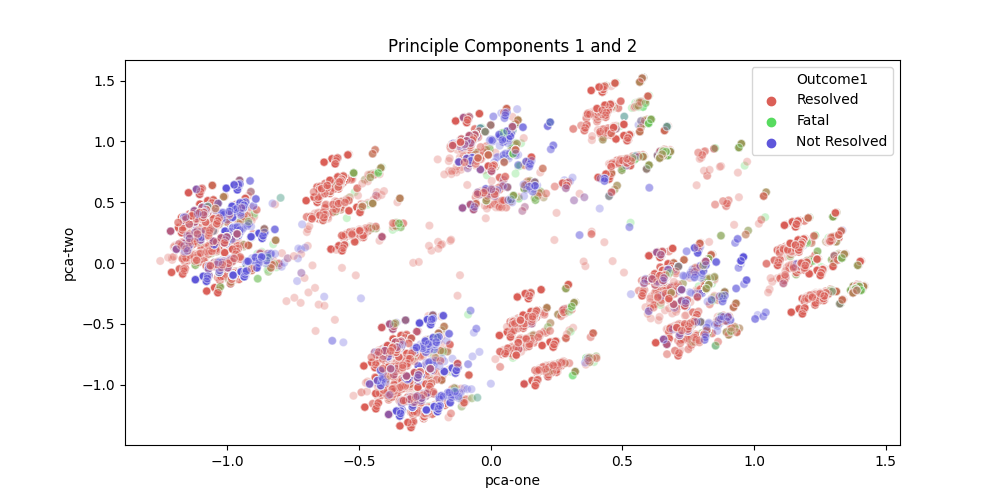

[Text(0.5, 1.0, 'Principle Components 1 and 2')]

In [84]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Outcome1",
    palette=sns.color_palette("hls", 3),
    data = oneHot_df,
    legend="full",
    alpha=0.3
)
ax.set(title="Principle Components 1 and 2")

##### PCA with less categories as predictors

In [85]:
categorical_columns=['Accurate_Episode_Month', 'Specimen_Submitted', 'Age_Group', 'Client_Gender', 'Outbreak_Related', 'Case_AcquisitionInfo']
oneHot_df = df[categorical_columns+['Outcome1']].copy()
#oneHot_df = df[categorical_columns].copy()
for cat in categorical_columns:
    oneHot_df = pd.concat([oneHot_df, pd.get_dummies(df[cat], prefix=cat, drop_first=False)], axis=1).drop(cat, axis=1)


In [86]:
from sklearn.decomposition import PCA

tmp_df = oneHot_df.copy().drop('Outcome1', axis=1)

pca = PCA(n_components=10)
pca_result = pca.fit_transform(tmp_df.values)
oneHot_df['pca-one'] = pca_result[:,0]
oneHot_df['pca-two'] = pca_result[:,1] 
#oneHot_df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.1977119  0.13658505 0.11966183 0.10233277 0.0677325  0.06516026
 0.04910701 0.0439075  0.04258761 0.03706489]


<IPython.core.display.Javascript object>


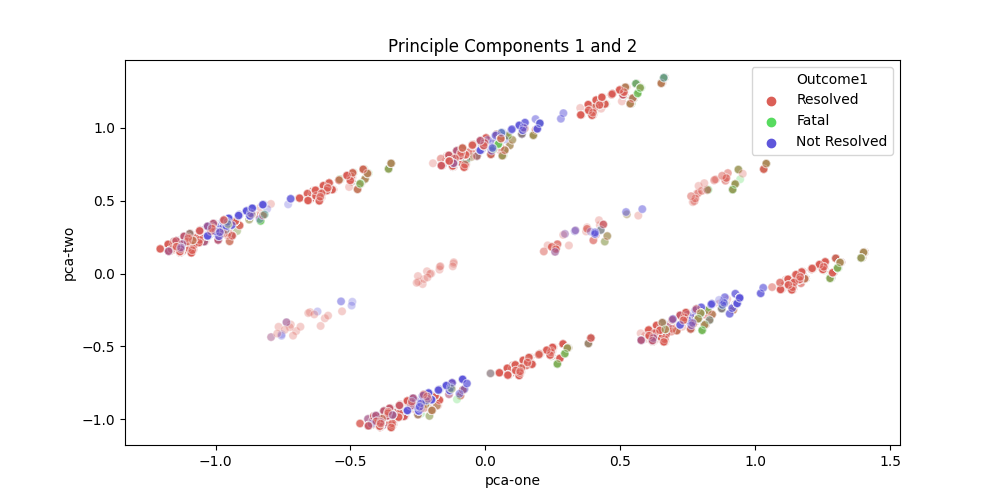

[Text(0.5, 1.0, 'Principle Components 1 and 2')]

In [87]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Outcome1",
    palette=sns.color_palette("hls", 3),
    data = oneHot_df,
    legend="full",
    alpha=0.3
)
ax.set(title="Principle Components 1 and 2")

Dropping the reporting city improved the explained variance ratio of the first two principle components but it remains low at around 53%. 